# <font color= #FF1555 size= 6 ><center><u>Time Series Forecasting</u></center></font>

# Problem 1: Dataset - Rose

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

### Data Dictionary:

<b>Variable Name</b><br>
YearMonth<br>
Rose<br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## 1. Read the data as an appropriate Time Series data and plot the data.
### Read the data from the '.csv' file as a monthly Time Series.

In [2]:
df = pd.read_csv('Rose.csv')
df.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

### Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [3]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [4]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [5]:
df.set_index('Time_Stamp',inplace=True)
df.head()

YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0

### Plot the Time Series to understand the behaviour of the data.

In [6]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

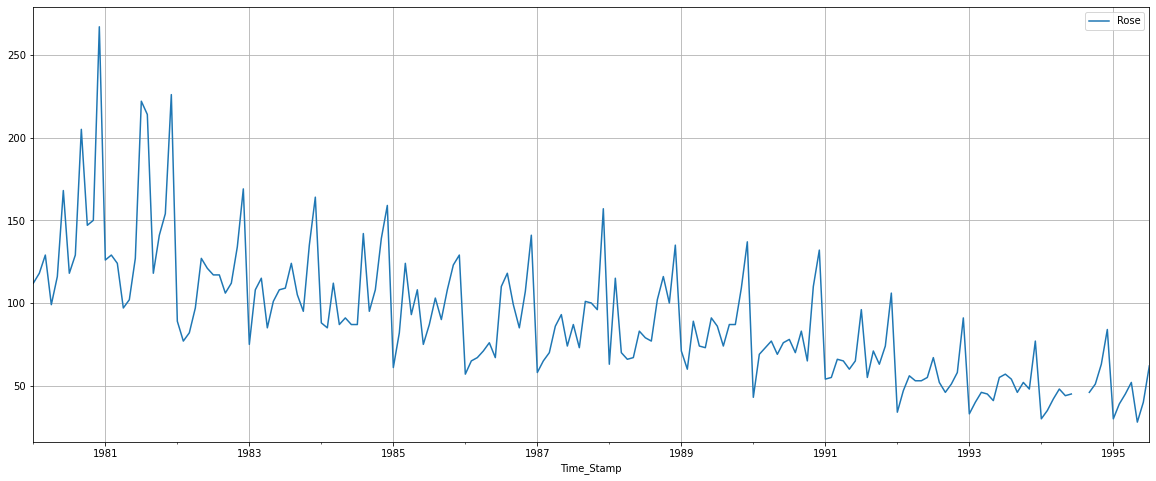

In [7]:
df.plot()
plt.grid();

We can see that there is a slight downward trend with a seasonal pattern associated as well.

### Check the basic measures of descriptive statistics

In [8]:
df.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


<b>Inference:</b>
<br>
• There are 187 records present in the dataset. There is 2 records have null values in the dataset

### Plot a boxplot to understand the spread of sales across different years and within different months across years.

### Yearly Boxplot

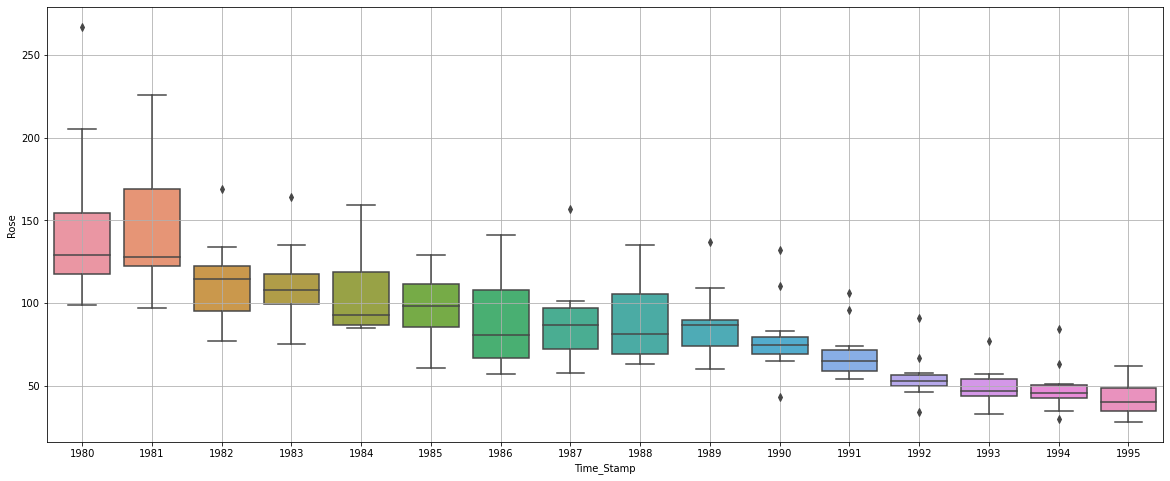

In [10]:
sns.boxplot(x = df.index.year,y = df['Rose'])
plt.grid();

The yearly boxplots also shows that the Sales have decreased towards the last few years.

### Monthly Plot

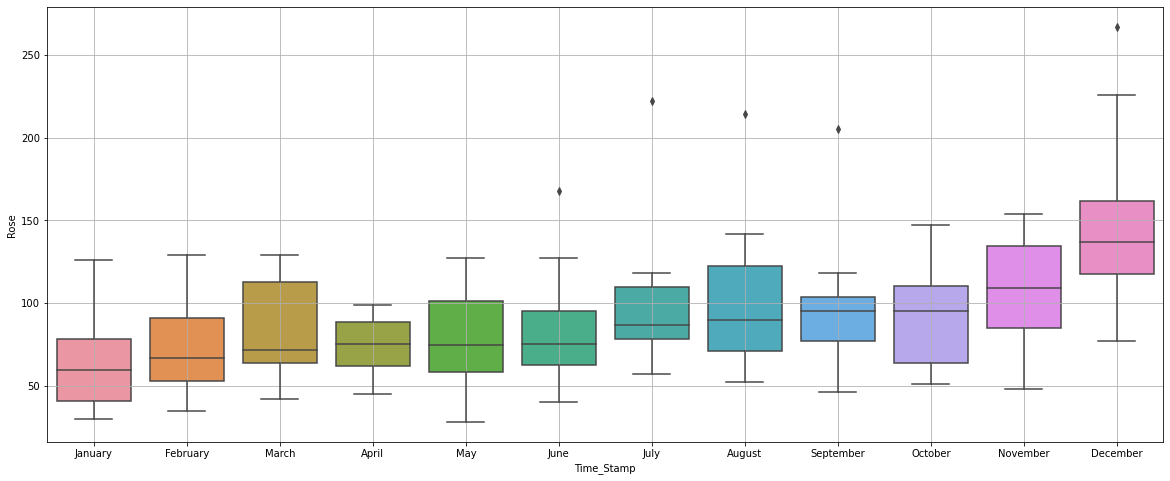

In [11]:
sns.boxplot(x = df.index.month_name(),y = df['Rose'])
plt.grid();

There is a clear distinction of 'sales' within different months spread across various years. The highest such numbers are being recorded in the month of November and December across various years.

## Plot a time series monthplot to understand the spread of Sales across different years and within different months across years.

C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


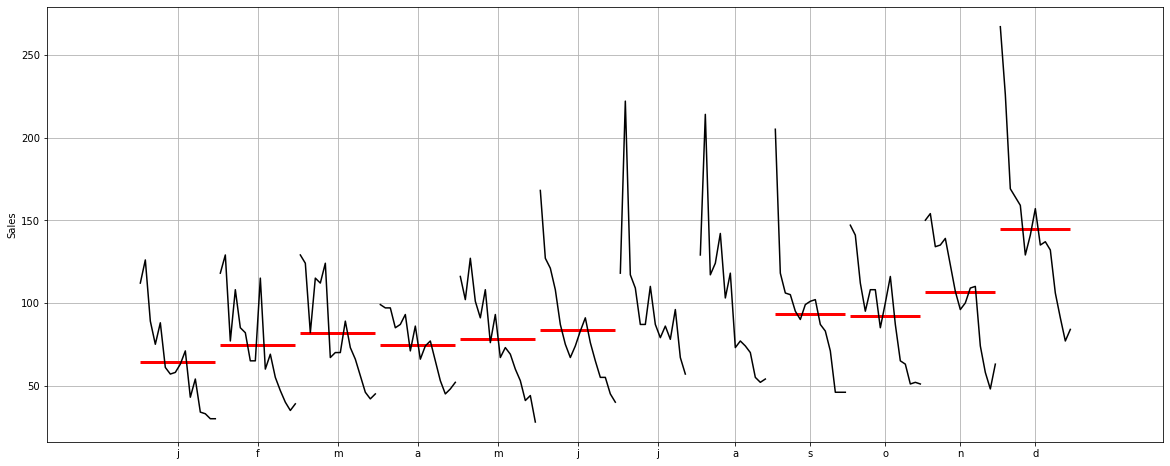

In [12]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Rose'],ylabel='Sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('Rose' in this case) across various months. The red line is the median value.

## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

### Plot the Time Series according to different months for different years.

In [13]:
df.drop(labels='YearMonth',inplace=True,axis=1)
df.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [14]:
df['Rose']

Time_Stamp
1980-01-31    112.0
1980-02-29    118.0
1980-03-31    129.0
1980-04-30     99.0
1980-05-31    116.0
              ...  
1995-03-31     45.0
1995-04-30     52.0
1995-05-31     28.0
1995-06-30     40.0
1995-07-31     62.0
Name: Rose, Length: 187, dtype: float64

### Plot a graph of monthly Sales across years.

In [15]:
yearly_sales_across_months = pd.pivot_table(df, values = 'Rose', columns = df.index.month, 
                                        index = df.index.year)

yearly_sales_across_months

Time_Stamp     1      2      3     4      5      6      7      8      9   \
Time_Stamp                                                                 
1980        112.0  118.0  129.0  99.0  116.0  168.0  118.0  129.0  205.0   
1981        126.0  129.0  124.0  97.0  102.0  127.0  222.0  214.0  118.0   
1982         89.0   77.0   82.0  97.0  127.0  121.0  117.0  117.0  106.0   
1983         75.0  108.0  115.0  85.0  101.0  108.0  109.0  124.0  105.0   
1984         88.0   85.0  112.0  87.0   91.0   87.0   87.0  142.0   95.0   
1985         61.0   82.0  124.0  93.0  108.0   75.0   87.0  103.0   90.0   
1986         57.0   65.0   67.0  71.0   76.0   67.0  110.0  118.0   99.0   
1987         58.0   65.0   70.0  86.0   93.0   74.0   87.0   73.0  101.0   
1988         63.0  115.0   70.0  66.0   67.0   83.0   79.0   77.0  102.0   
1989         71.0   60.0   89.0  74.0   73.0   91.0   86.0   74.0   87.0   
1990         43.0   69.0   73.0  77.0   69.0   76.0   78.0   70.0   83.0   
1991         54.0   55.0   66.0  65.0   60.0   65.0   96.0   55.0   71.0   
1992         34.0   47.0   56.0  53.0   53.0   55.0   67.0   52.0   46.0   
1993         33.0   40.0   46.0  45.0   41.0   55.0   57.0   54.0   46.0   
1994         30.0   35.0   42.0  48.0   44.0   45.0    NaN    NaN   46.0   
1995         30.0   39.0   45.0  52.0   28.0   40.0   62.0    NaN    NaN   

Time_Stamp     10     11     12  
Time_Stamp                       
1980        147.0  150.0  267.0  
1981        141.0  154.0  226.0  
1982        112.0  134.0  169.0  
1983         95.0  135.0  164.0  
1984        108.0  139.0  159.0  
1985        108.0  123.0  129.0  
1986         85.0  107.0  141.0  
1987        100.0   96.0  157.0  
1988        116.0  100.0  135.0  
1989         87.0  109.0  137.0  
1990         65.0  110.0  132.0  
1991         63.0   74.0  106.0  
1992         51.0   58.0   91.0  
1993         52.0   48.0   77.0  
1994         51.0   63.0   84.0  
1995          NaN    NaN    NaN

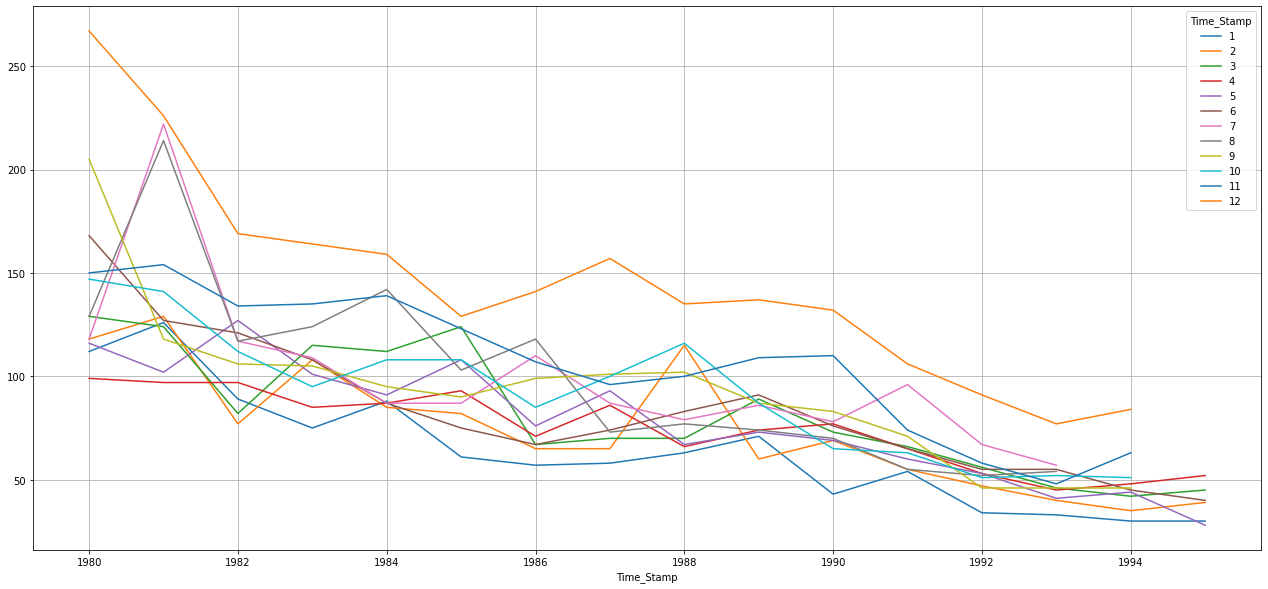

In [16]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

### Read this monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences.

Yearly Plot

In [17]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

Rose
Time_Stamp        
1980-12-31  1758.0
1981-12-31  1780.0
1982-12-31  1348.0
1983-12-31  1324.0
1984-12-31  1280.0

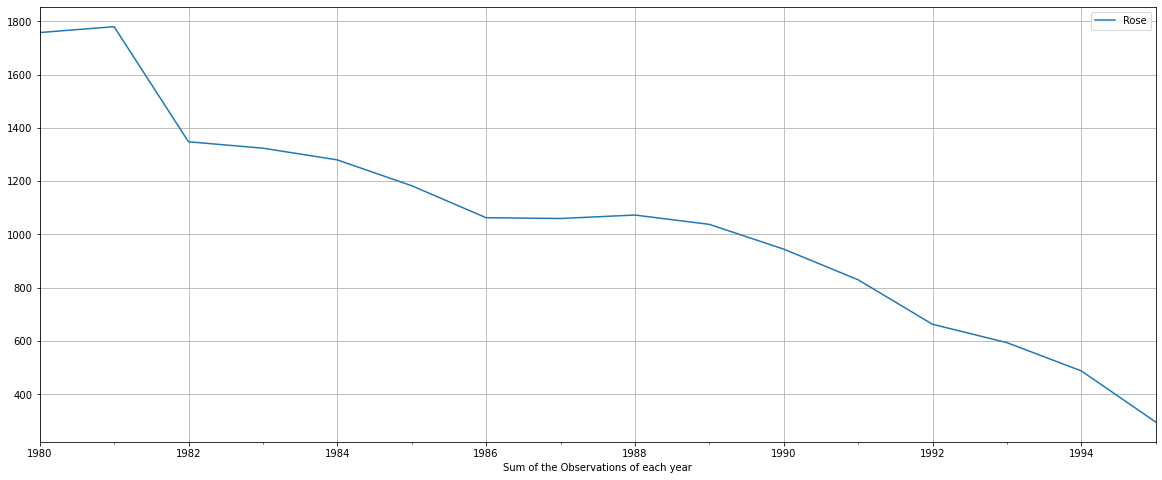

In [18]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [19]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean.head()

Rose
Time_Stamp            
1980-12-31  146.500000
1981-12-31  148.333333
1982-12-31  112.333333
1983-12-31  110.333333
1984-12-31  106.666667

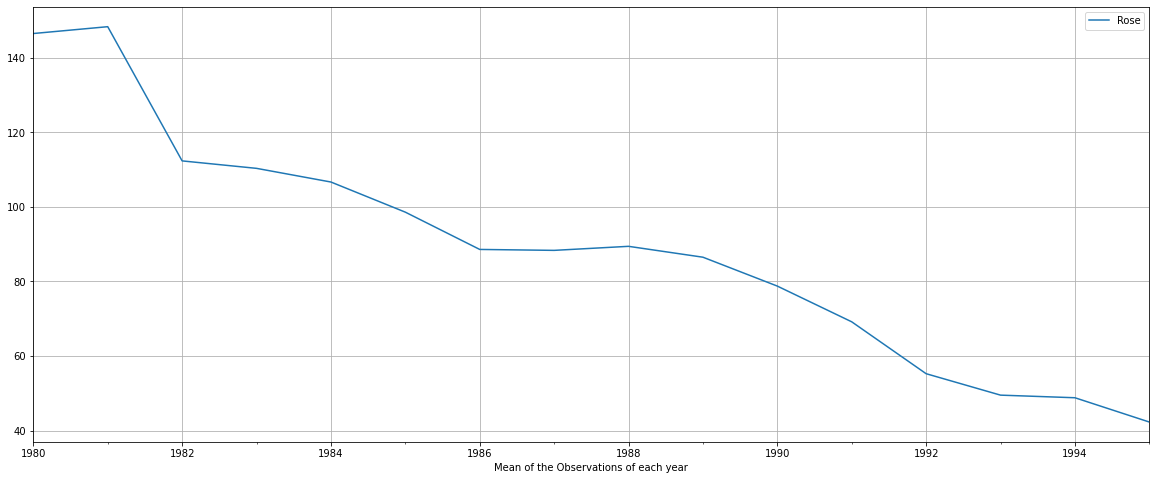

In [20]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

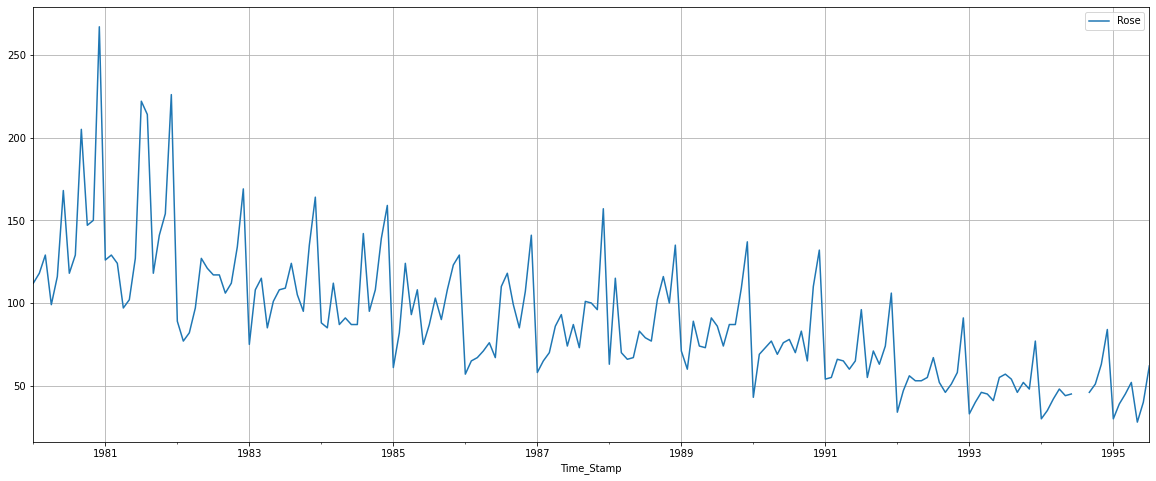

In [21]:
df.plot()
plt.grid();

Quarterly Plot

In [22]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()

Rose
Time_Stamp       
1980-03-31  359.0
1980-06-30  383.0
1980-09-30  452.0
1980-12-31  564.0
1981-03-31  379.0

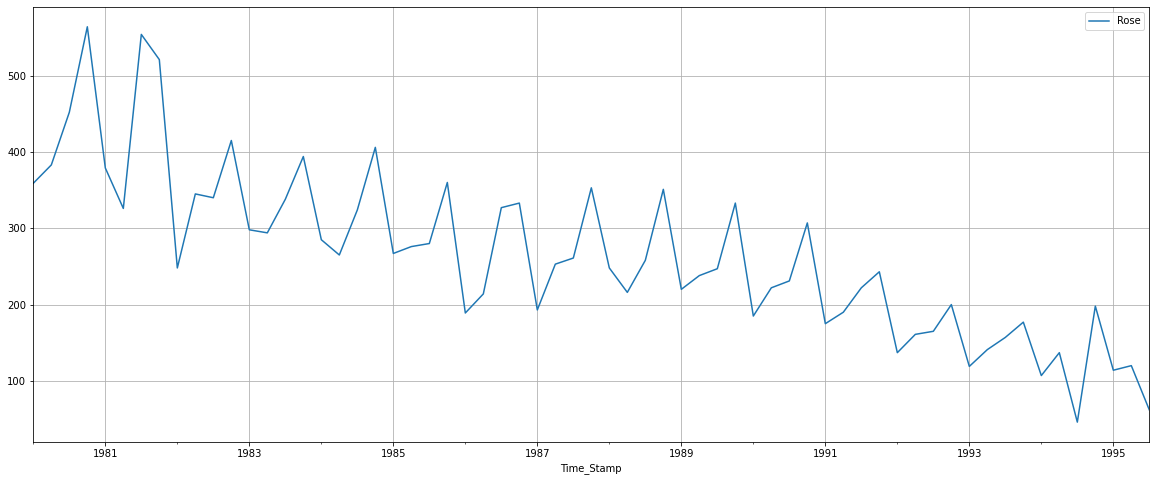

In [23]:
df_quarterly_sum.plot();
plt.grid()

In [24]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

Rose
Time_Stamp            
1980-03-31  119.666667
1980-06-30  127.666667
1980-09-30  150.666667
1980-12-31  188.000000
1981-03-31  126.333333

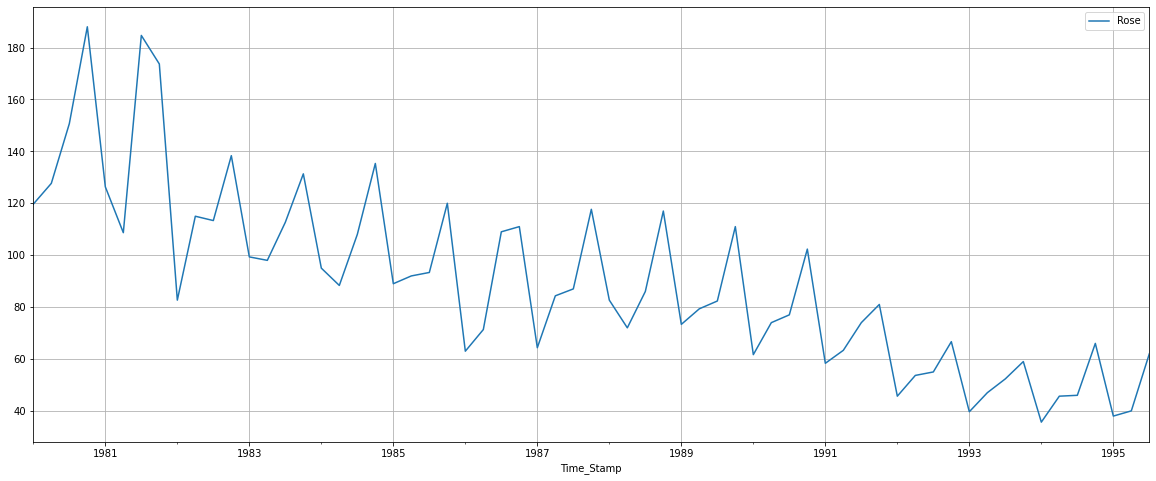

In [25]:
df_quarterly_mean.plot();
plt.grid()

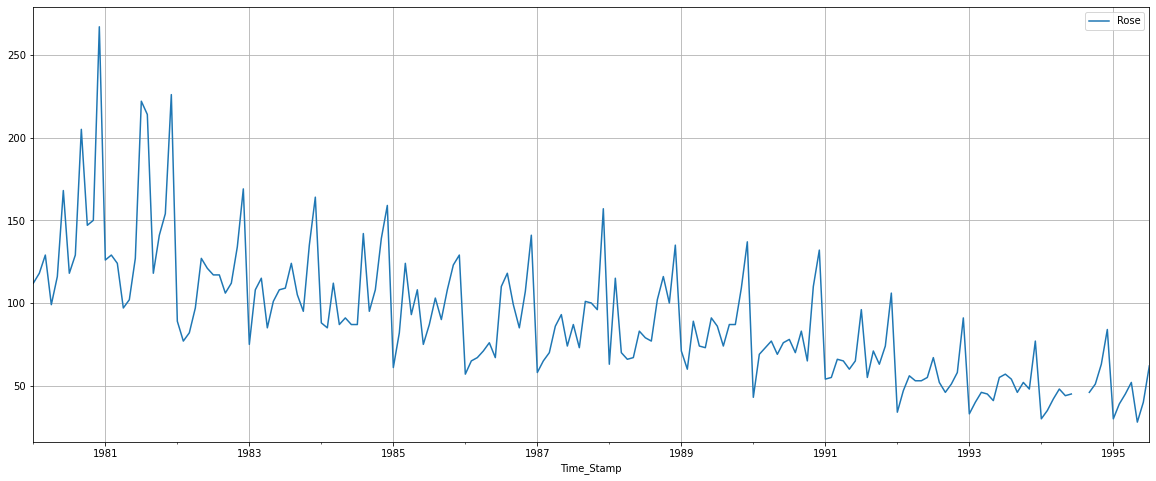

In [26]:
df.plot()
plt.grid();

Daily plot

In [27]:
df_daily_sum = df.resample('D').sum()
df_daily_sum

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-01    0.0
1980-02-02    0.0
1980-02-03    0.0
1980-02-04    0.0
...           ...
1995-07-27    0.0
1995-07-28    0.0
1995-07-29    0.0
1995-07-30    0.0
1995-07-31   62.0

[5661 rows x 1 columns]

The values which the original series cannot provide is taken as 0 by python if we try to resample the data on a daily basis.

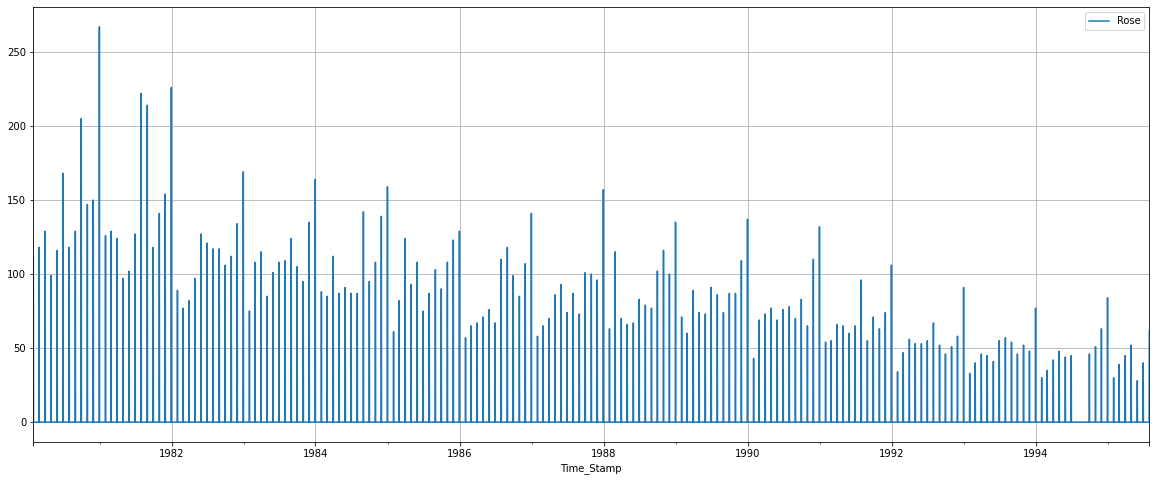

In [28]:
df_daily_sum.plot()
plt.grid();

The above graph fails to give us a proper understanding of our data. Thus, resampling the data to intervals where a number of observations are 0 is not a good idea as that does not give us an understanding of the performance of the time series.

To get a very high-level overview of the trend of the Time Series Data (if Trend is present) can be understood by resampling the data keeping the intervals very large.

Decade Plot

In [29]:
df_decade_sum = df.resample('5Y').sum()
df_decade_sum

Rose
Time_Stamp        
1980-12-31  1758.0
1985-12-31  6915.0
1990-12-31  5179.0
1995-12-31  2871.0

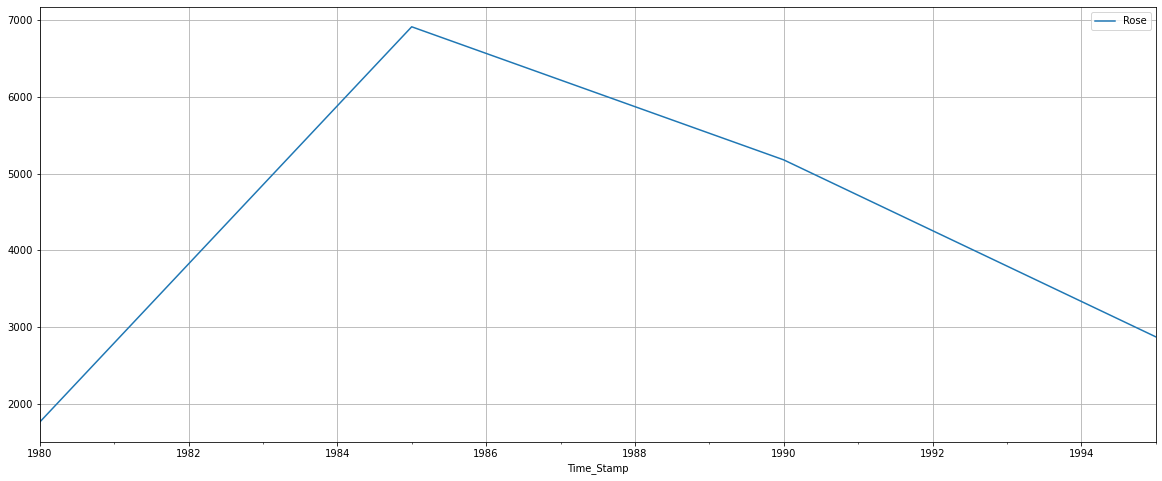

In [30]:
df_decade_sum.plot();
plt.grid()

If we take the resampling period to be 5 years or a decade, we see that the seasonality present has been smoothed over and it is only giving an estimate of the trend.

### Missing Value Handling

Methods of imputation for replacing missing values

In [31]:
df_1=df.copy()

In [32]:
df_1['1994']

Rose
Time_Stamp      
1994-01-31  30.0
1994-02-28  35.0
1994-03-31  42.0
1994-04-30  48.0
1994-05-31  44.0
1994-06-30  45.0
1994-07-31   NaN
1994-08-31   NaN
1994-09-30  46.0
1994-10-31  51.0
1994-11-30  63.0
1994-12-31  84.0

We are going to replace the value '45.0' with a NaN value.

In [33]:
df_missing_value1 = df_1['1994'].replace(to_replace=45.0,value=np.NaN)

In [34]:
df_missing_value1.isna()

Rose
Time_Stamp       
1994-01-31  False
1994-02-28  False
1994-03-31  False
1994-04-30  False
1994-05-31  False
1994-06-30   True
1994-07-31   True
1994-08-31   True
1994-09-30  False
1994-10-31  False
1994-11-30  False
1994-12-31  False

In [36]:
df_missing_value1.isna().sum()

Rose    3
dtype: int64

In [35]:
df_missing_value1.interpolate()['1994']

Rose
Time_Stamp      
1994-01-31  30.0
1994-02-28  35.0
1994-03-31  42.0
1994-04-30  48.0
1994-05-31  44.0
1994-06-30  44.5
1994-07-31  45.0
1994-08-31  45.5
1994-09-30  46.0
1994-10-31  51.0
1994-11-30  63.0
1994-12-31  84.0

In [36]:
df_missing_value1.interpolate(method='spline',order=1)['1994']

Rose
Time_Stamp           
1994-01-31  30.000000
1994-02-28  35.000000
1994-03-31  42.000000
1994-04-30  48.000000
1994-05-31  44.000000
1994-06-30  45.312182
1994-07-31  45.512934
1994-08-31  45.713686
1994-09-30  46.000000
1994-10-31  51.000000
1994-11-30  63.000000
1994-12-31  84.000000

In [37]:
df_missing_value1.interpolate(method='pad')['1994']

Rose
Time_Stamp      
1994-01-31  30.0
1994-02-28  35.0
1994-03-31  42.0
1994-04-30  48.0
1994-05-31  44.0
1994-06-30  44.0
1994-07-31  44.0
1994-08-31  44.0
1994-09-30  46.0
1994-10-31  51.0
1994-11-30  63.0
1994-12-31  84.0

As per the finding we can use spline to fill missing values

In [38]:
df_2=df_1.interpolate(method='spline',order=1)

In [39]:
df_2['1994']

Rose
Time_Stamp           
1994-01-31  30.000000
1994-02-28  35.000000
1994-03-31  42.000000
1994-04-30  48.000000
1994-05-31  44.000000
1994-06-30  45.000000
1994-07-31  46.155493
1994-08-31  47.221907
1994-09-30  46.000000
1994-10-31  51.000000
1994-11-30  63.000000
1994-12-31  84.000000

Decompose is not allowed the data set with missing values. So, We are going to use df_2 to decompose the time series without missing value..

### Decompose the Time Series

Additive Model

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

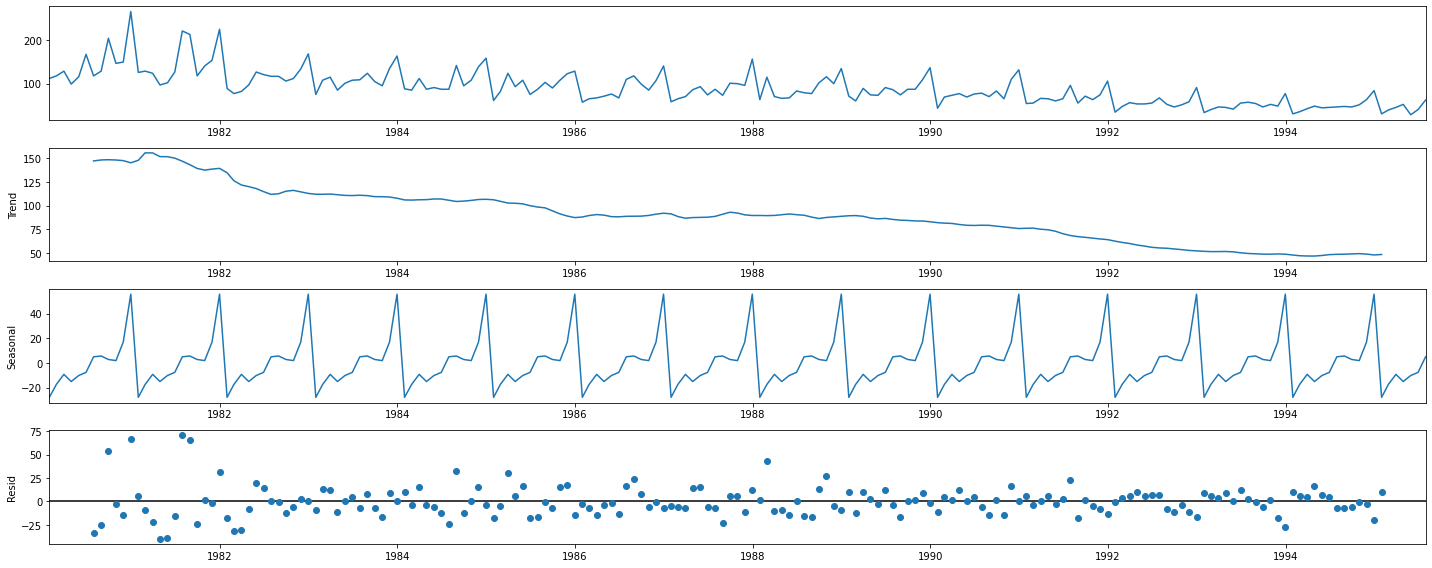

In [41]:
decomposition = seasonal_decompose(df_2,model='additive')
decomposition.plot();

As per the 'additive' decomposition, we see that there is a decrease order trend in the data. There is a seasonality as well.

In [42]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [43]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.921848
1980-02-29   -17.445147
1980-03-31    -9.299974
1980-04-30   -15.112474
1980-05-31   -10.210688
1980-06-30    -7.692831
1980-07-31     4.938518
1980-08-31     5.590168
1980-09-30     2.761485
1980-10-31     1.858708
1980-11-30    16.833708
1980-12-31    55.700374
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -34.021852
1980-08-31   -24.715168
1980-09-30    53.863515
1980-10-31    -2.942041
1980-11-30   -14.250374
1980-12-31    66.17

In [44]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    113.061482
1980-08-31    123.409832
1980-09-30    202.238515
1980-10-31    145.141292
1980-11-30    133.166292
1980-12-31    211.299626
dtype: float64

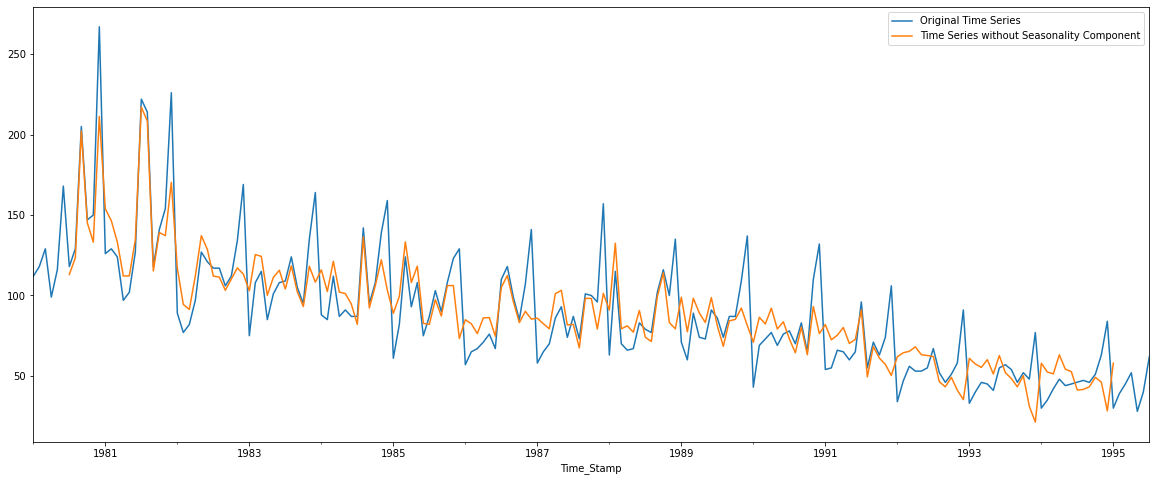

In [45]:
df_2.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

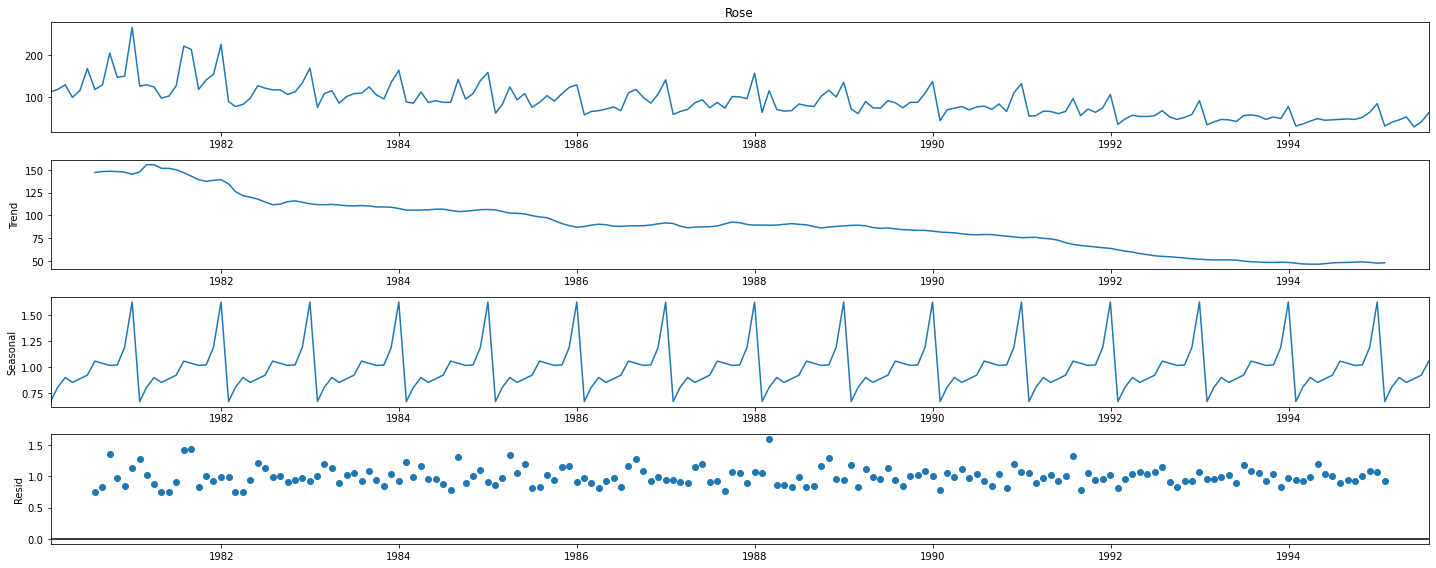

In [46]:
decomposition = seasonal_decompose(df_2['Rose'],model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

In [47]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.669945
1980-02-29    0.806018
1980-03-31    0.900897
1980-04-30    0.853717
1980-05-31    0.889141
1980-06-30    0.923716
1980-07-31    1.058922
1980-08-31    1.037766
1980-09-30    1.017401
1980-10-31    1.022301
1980-11-30    1.192005
1980-12-31    1.628171
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.757626
1980-08-31    0.839193
1980-09-30    1.358004
1980-10-31    0.971029
1980-11-30    0.853624
1980-12-31    1.129976
Name: resid, dtype:

### Plot the Empirical Cumulative Distribution.

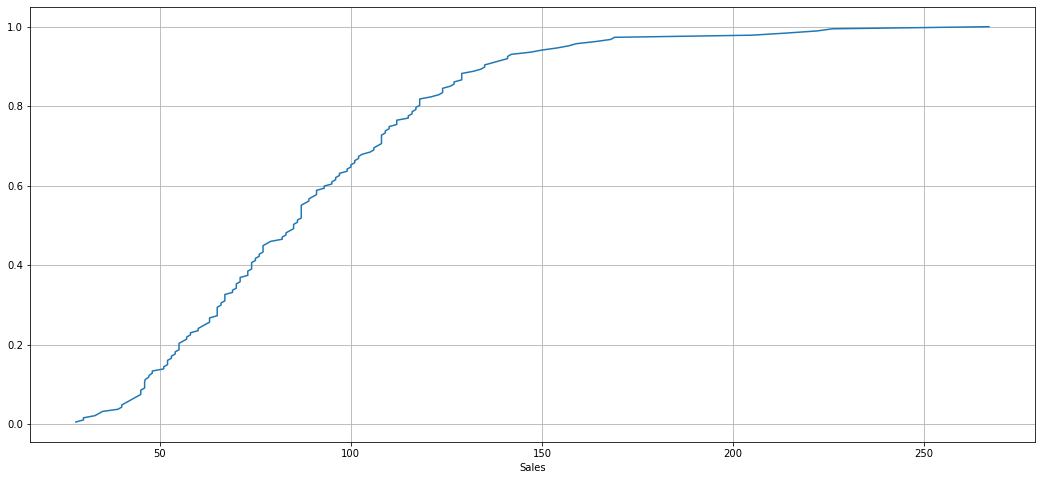

In [48]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df_2['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sales.

## Plot the average Sales per month and the month on month percentage change of Sales.

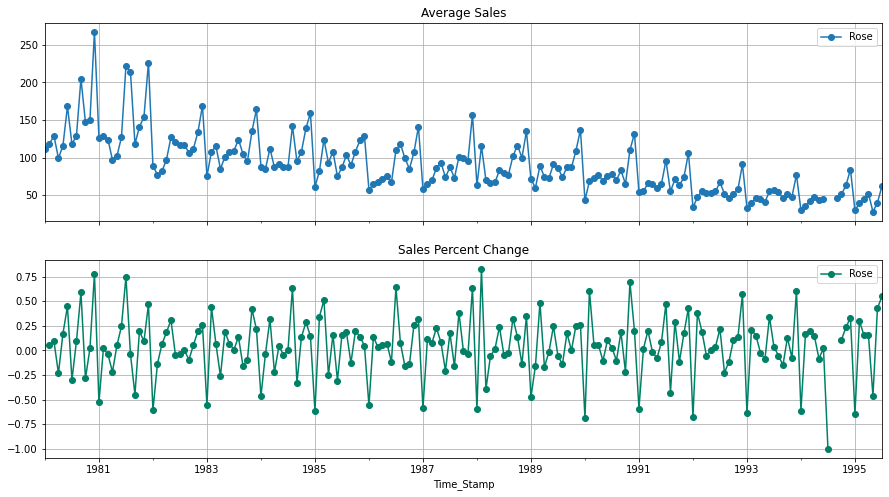

In [49]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df_2.index)["Rose"].mean()
pct_change = df.groupby(df_2.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

The above two graphs tells us the Average 'Sales' and the Percentage change of 'Sales' with respect to the time.

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

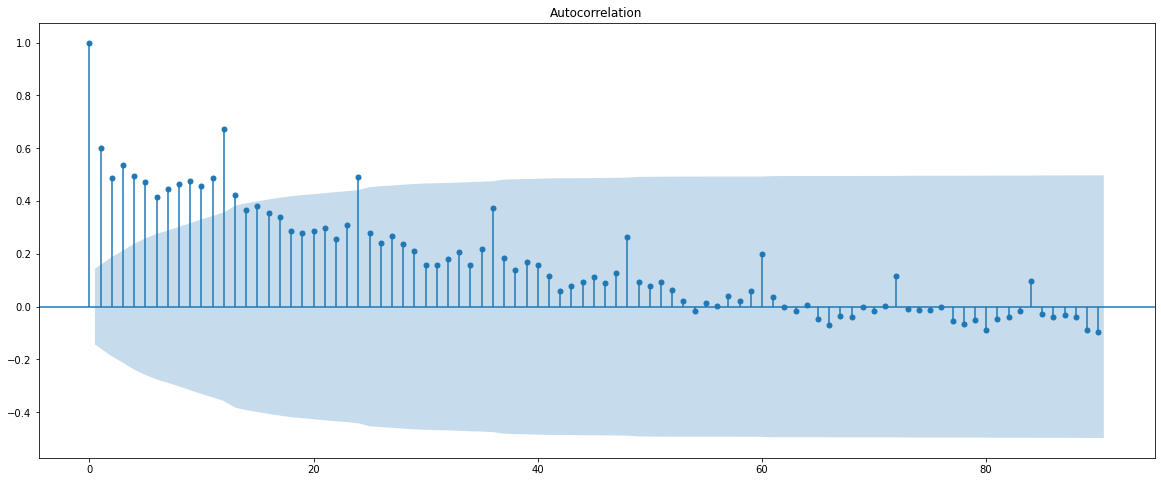

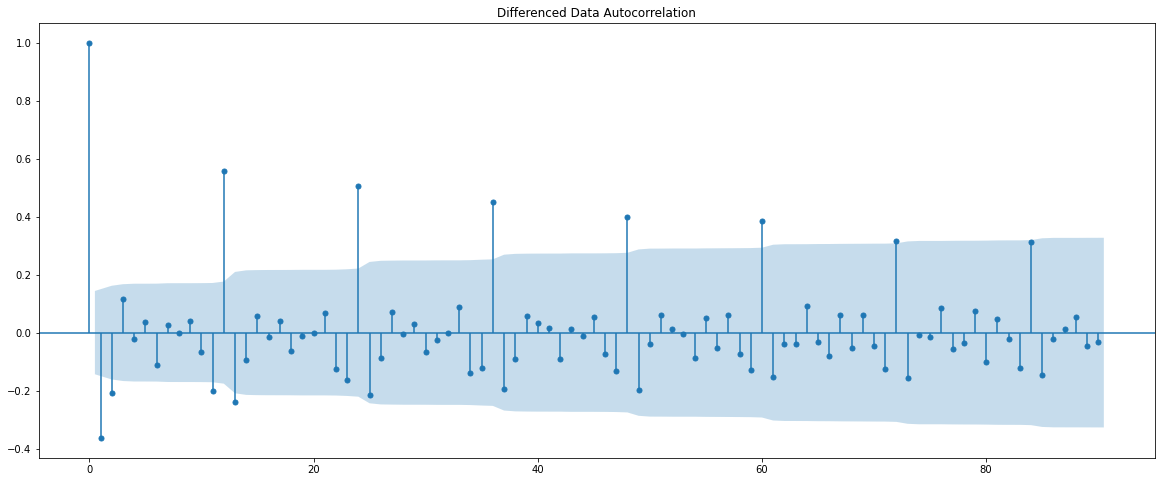

In [54]:
plot_acf(df_2['Rose'],lags=90)
plot_acf(df_2['Rose'].diff().dropna(),lags=90,title='Differenced Data Autocorrelation')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


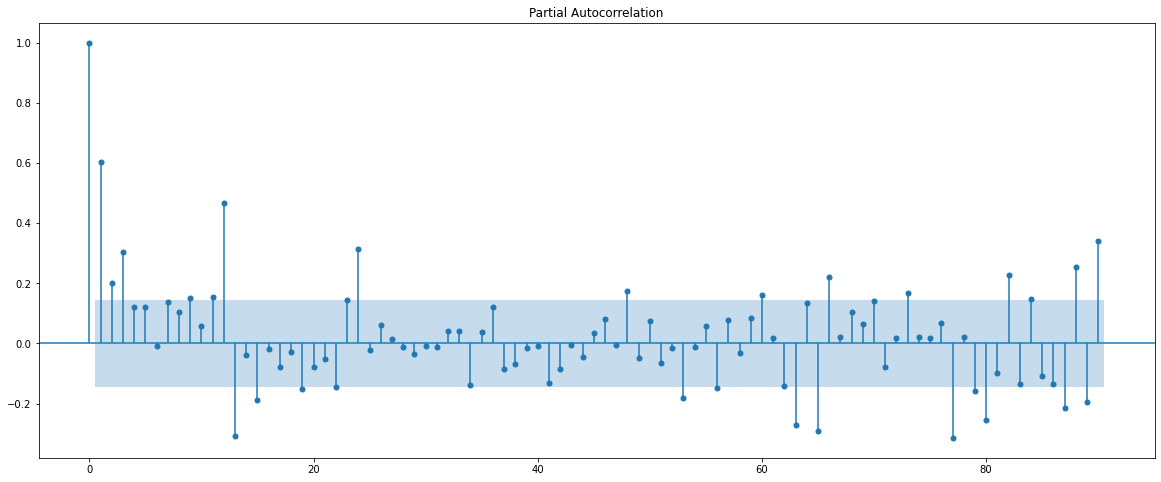

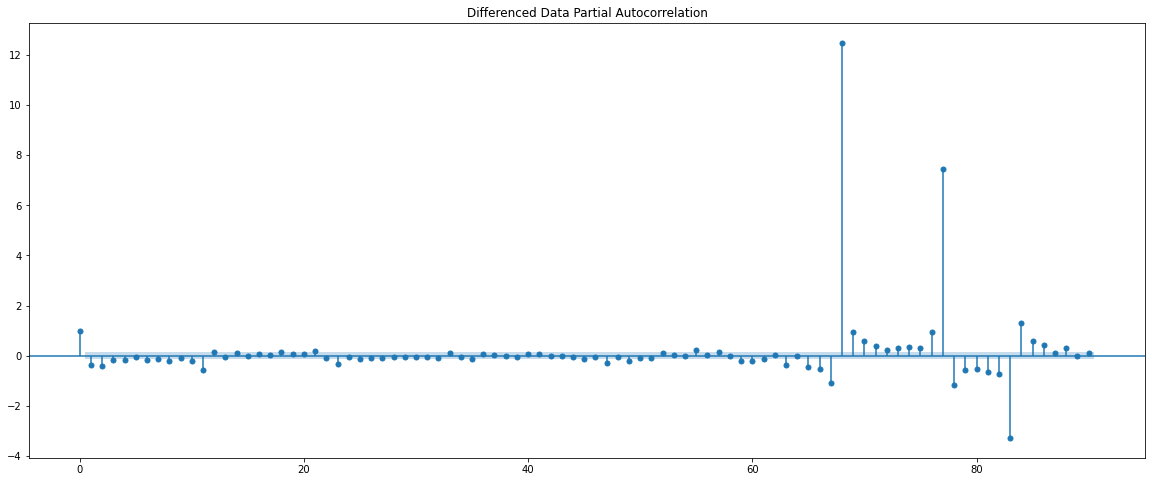

In [55]:
plot_pacf(df_2['Rose'],lags=90)
plot_pacf(df_2['Rose'].diff().dropna(),lags=90,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data.

## 3. Split the data into training and test. The test data should start in 1991.

#### Split the data into train and test and plot the training and test data.

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [56]:
train=df_2[df_2.index.year < 1991]
test=df_2[df_2.index.year >= 1991]

In [57]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [58]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Test Data


Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Test Data


Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [59]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


## 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Building different models and comparing the accuracy metrics.

### Model 1: Linear Regression

In [60]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [61]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [62]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr = LinearRegression()

In [65]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

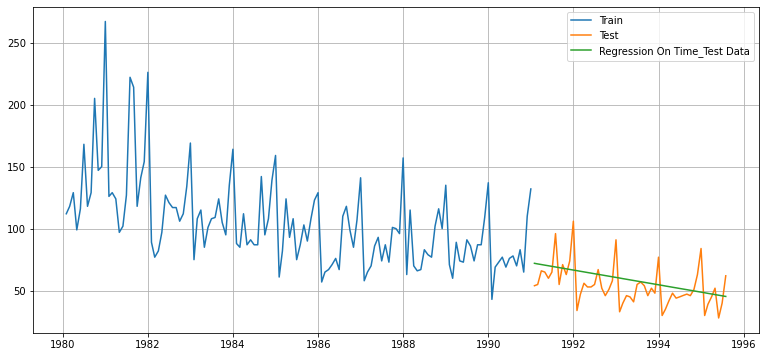

In [66]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

Defining the accuracy metrics.

In [67]:
from sklearn import metrics

Model Evaluation

In [68]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.255


Model 2: Naive Approach: y^t+1=yt

In [69]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [70]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

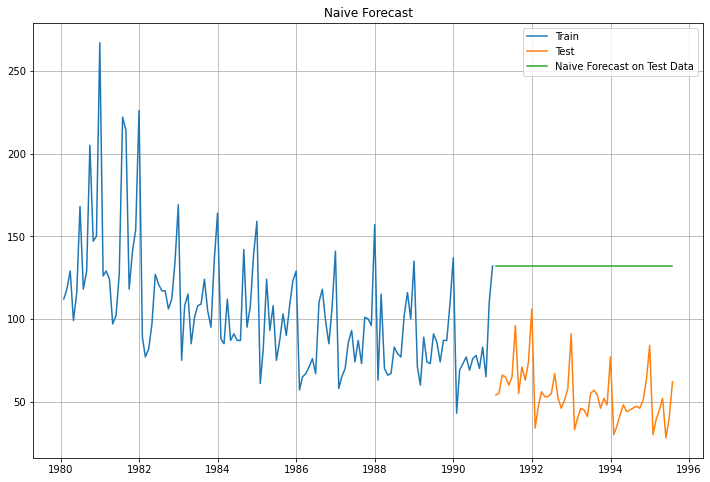

In [71]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

Model Evaluation

In [219]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive forecast on the Test Data,  RMSE is 79.672


Method 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [73]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [74]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
Time_Stamp                     
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

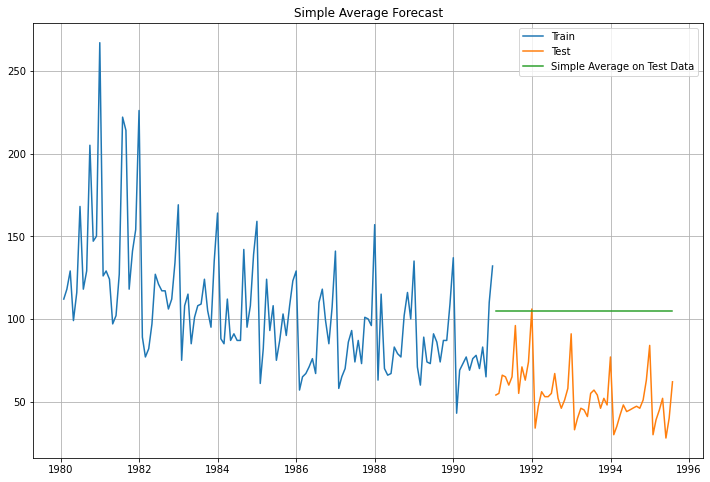

In [75]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

Model Evaluation

In [76]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.413


In [173]:
resultsDf = pd.DataFrame({'Test RMSE': []})

resultsDf_1 = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf = pd.concat([resultsDf, resultsDf_1])

resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])

resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    15.255435
NaiveModel          79.672238
SimpleAverageModel  53.413057

Method 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
For Moving Average, we are going to average over the entire data.

In [78]:
MovingAverage = df_2.copy()
MovingAverage.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Trailing moving averages

In [79]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

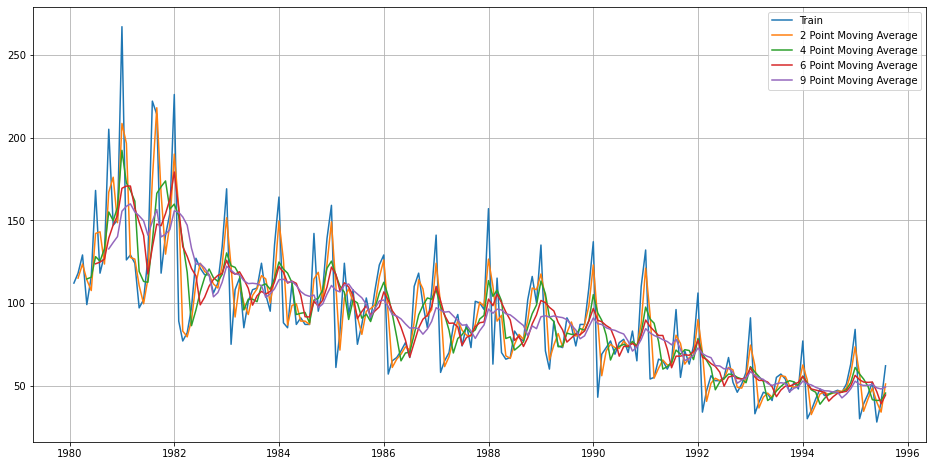

In [80]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [81]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

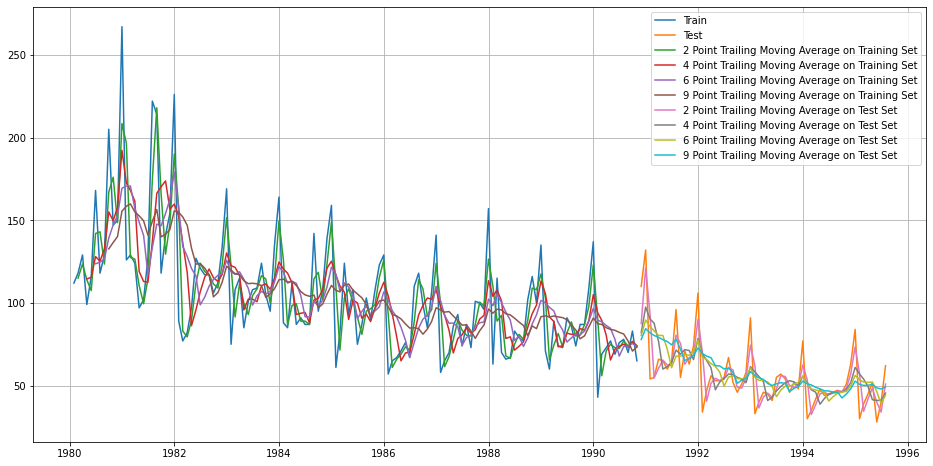

In [82]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

Model Evaluation

In [83]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(trailing_MovingAverage_test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(trailing_MovingAverage_test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(trailing_MovingAverage_test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(trailing_MovingAverage_test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9)) 

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.802
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 15.361
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 15.852
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 16.337 


In [174]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             15.255435
NaiveModel                   79.672238
SimpleAverageModel           53.413057
2pointTrailingMovingAverage  11.801718
4pointTrailingMovingAverage  15.360804
6pointTrailingMovingAverage  15.852264
9pointTrailingMovingAverage  16.336588

Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

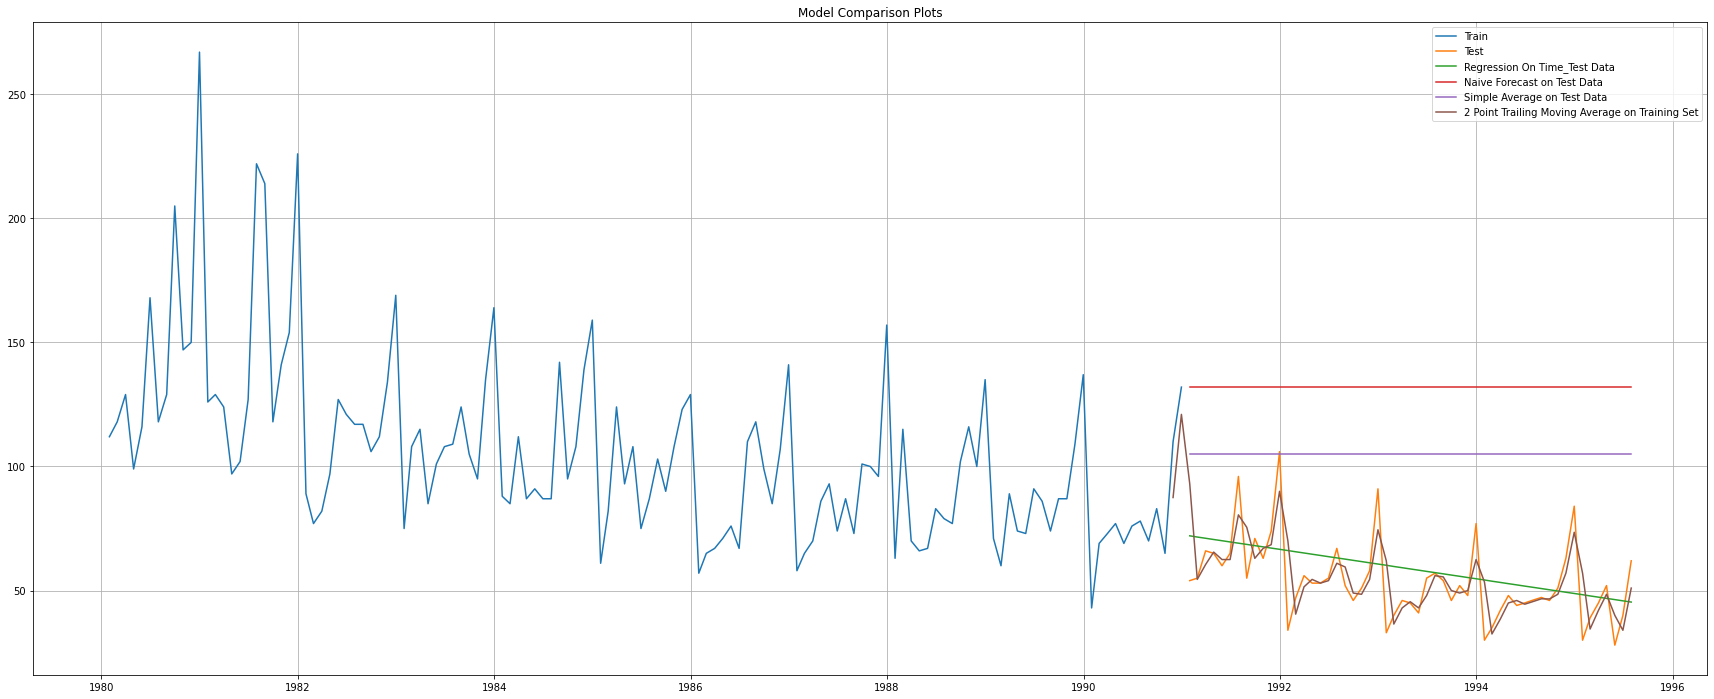

In [85]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

Method 5: Simple Exponential Smoothing

In [86]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [87]:
SES_train = train.copy()
SES_test = test.copy()

In [88]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [89]:
model_SES_autofit = model_SES.fit(optimized=True)

In [90]:
model_SES_autofit.params

{'smoothing_level': 0.09874989825614361,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702255613862,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [91]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  87.104999
1991-02-28  55.0  87.104999
1991-03-31  66.0  87.104999
1991-04-30  65.0  87.104999
1991-05-31  60.0  87.104999

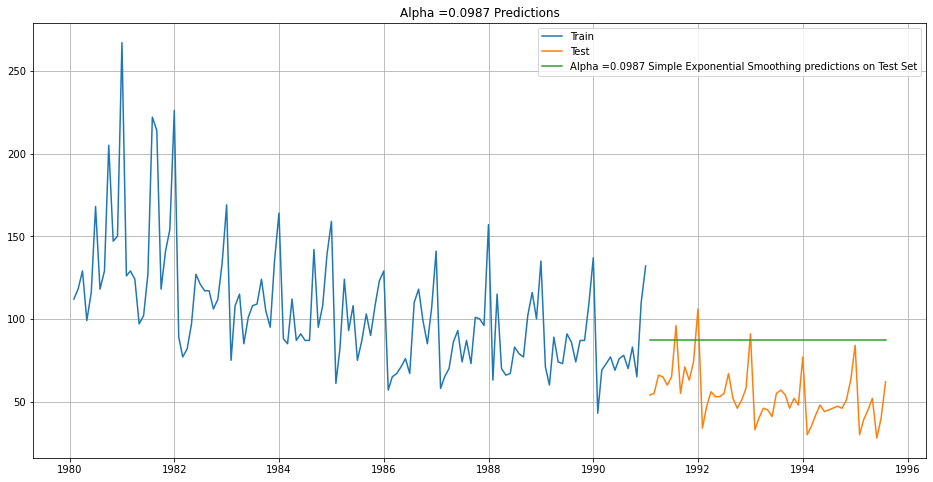

In [211]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0987 Predictions');

Model Evaluation for α = 0.0987 : Simple Exponential Smoothing

In [212]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.748


In [213]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.0987,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                                    15.255435
NaiveModel                                          79.672238
SimpleAverageModel                                  53.413057
2pointTrailingMovingAverage                         11.801718
4pointTrailingMovingAverage                         15.360804
6pointTrailingMovingAverage                         15.852264
9pointTrailingMovingAverage                         16.336588
Alpha=0.995,SimpleExponentialSmoothing              36.748161
Alpha=0.1,SimpleExponentialSmoothing                36.779952
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.873754
Alpha=0.0646,Beta=0.0531,Gamma=0.0,TripleExpone...  21.095148
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.627968
ARIMA(0,1,2)                                        18.478455
ARIMA(4,1,2)                                        33.903103
SARIMA(0,1,2)(2,0,2,12)                             26.880625
SARIMA(4,1,2)(4,0,2,12)                             18.478455
Alpha=0.0987,SimpleExponentialSmoothing             36.748161

In [95]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [96]:
np.any(np.isnan(resultsDf_6))

False

In [97]:
np.all(np.isfinite(resultsDf_6))

True

In [98]:
for i in np.arange(0.0,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

Model Evaluation

In [99]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
1           0.1   31.815610  36.779952
2           0.2   31.979391  41.313886
3           0.3   32.470164  47.457057
4           0.4   33.035130  53.719906
5           0.5   33.682839  59.594532
0           0.0   36.719452  60.196149
6           0.6   34.441171  64.924245
7           0.7   35.323261  69.651295
8           0.8   36.334596  73.727266
9           0.9   37.482782  77.092660

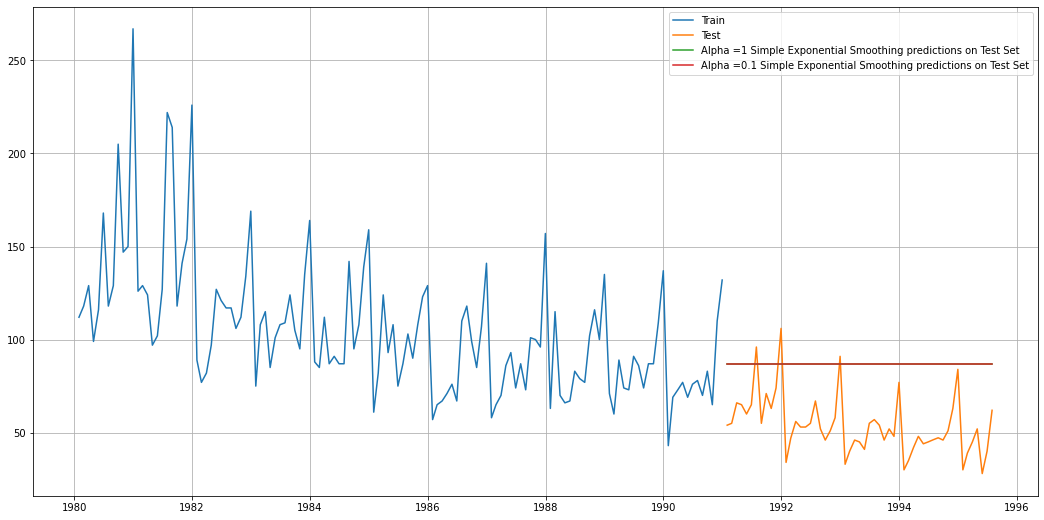

In [100]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [176]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                        15.255435
NaiveModel                              79.672238
SimpleAverageModel                      53.413057
2pointTrailingMovingAverage             11.801718
4pointTrailingMovingAverage             15.360804
6pointTrailingMovingAverage             15.852264
9pointTrailingMovingAverage             16.336588
Alpha=0.995,SimpleExponentialSmoothing  36.748161
Alpha=0.1,SimpleExponentialSmoothing    36.779952

Method 6: Double Exponential Smoothing (Holt's Model)

Two parameters α and β are estimated in this model. Level and Trend are accounted for in this model.

In [102]:
DES_train = train.copy()
DES_test = test.copy()

In [103]:
model_DES = Holt(DES_train['Rose'])

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [104]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [105]:
for i in np.arange(0.0,1.1,0.1):
    for j in np.arange(0.0,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [106]:
resultsDf_7

Alpha Values  Beta Values  Train RMSE    Test RMSE
0             0.0          0.0  476.514666  1023.260862
1             0.0          0.1  476.514666  1023.260862
2             0.0          0.2  476.514666  1023.260862
3             0.0          0.3  476.514666  1023.260862
4             0.0          0.4  476.514666  1023.260862
..            ...          ...         ...          ...
116           1.0          0.6   51.831610   801.622225
117           1.0          0.7   54.497039   841.834548
118           1.0          0.8   57.365879   853.907502
119           1.0          0.9   60.474309   834.652915
120           1.0          1.0   63.873454   780.021606

[121 rows x 4 columns]

Let us sort the data frame in the ascending ordering of the 'Test RMSE' values.

In [107]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
12           0.1          0.1   34.439111  36.873754
13           0.1          0.2   33.450729  48.634669
23           0.2          0.1   33.097427  65.677520
14           0.1          0.3   33.145789  78.100094
34           0.3          0.1   33.611269  98.598039

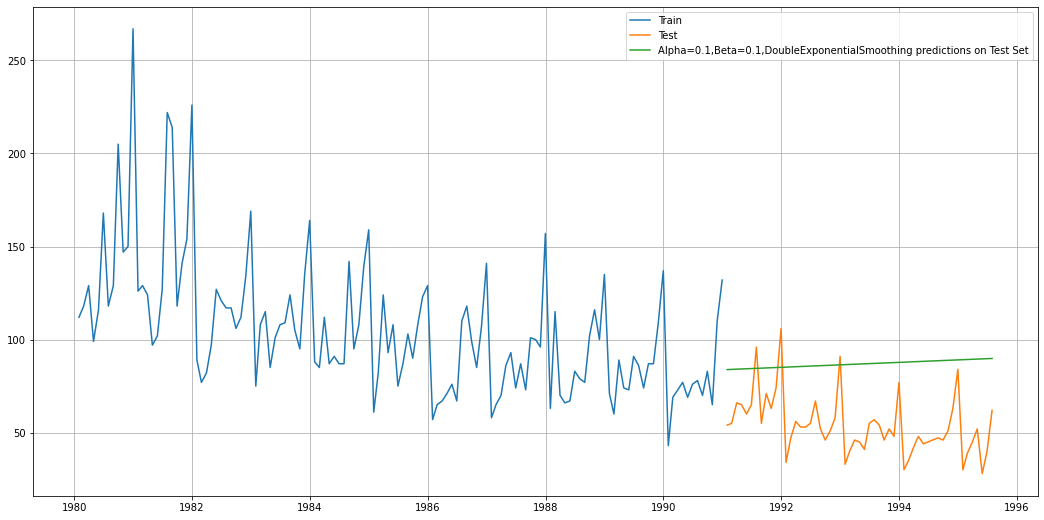

In [108]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [177]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                               15.255435
NaiveModel                                     79.672238
SimpleAverageModel                             53.413057
2pointTrailingMovingAverage                    11.801718
4pointTrailingMovingAverage                    15.360804
6pointTrailingMovingAverage                    15.852264
9pointTrailingMovingAverage                    16.336588
Alpha=0.995,SimpleExponentialSmoothing         36.748161
Alpha=0.1,SimpleExponentialSmoothing           36.779952
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  36.873754

Method 7: Triple Exponential Smoothing (Holt - Winter's Model)<br>
Three parameters α, β and γ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [110]:
TES_train = train.copy()
TES_test = test.copy()

In [111]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [112]:
model_TES_autofit = model_TES.fit()

In [113]:
model_TES_autofit.params

{'smoothing_level': 0.06467234615091698,
 'smoothing_trend': 0.05315920636255018,
 'smoothing_seasonal': 0.0,
 'damping_trend': nan,
 'initial_level': 50.880912909225756,
 'initial_trend': -0.31656840824205823,
 'initial_seasons': array([2.21583703, 2.51439498, 2.74693025, 2.40118428, 2.69936273,
        2.94338111, 3.2353888 , 3.44052906, 3.26420741, 3.19365239,
        3.72269442, 5.13435788]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [114]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose  auto_predict
Time_Stamp                    
1991-01-31  54.0     56.755640
1991-02-28  55.0     64.211013
1991-03-31  66.0     69.939833
1991-04-30  65.0     60.953618
1991-05-31  60.0     68.316934

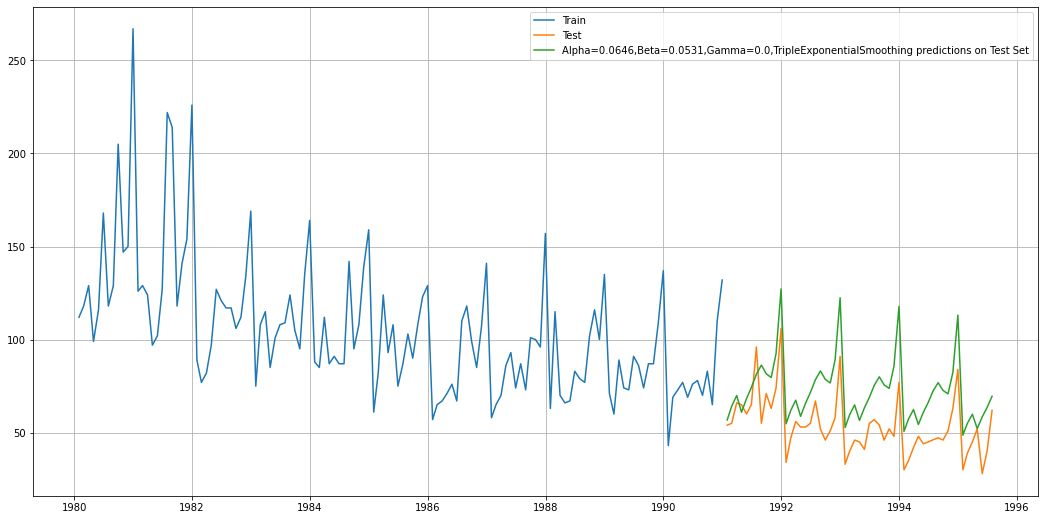

In [115]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.0646,Beta=0.0531,Gamma=0.0,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [116]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.0646,Beta=0.0531,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.0646,Beta=0.0531,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 21.095


In [178]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.0646,Beta=0.0531,Gamma=0.0,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    15.255435
NaiveModel                                          79.672238
SimpleAverageModel                                  53.413057
2pointTrailingMovingAverage                         11.801718
4pointTrailingMovingAverage                         15.360804
6pointTrailingMovingAverage                         15.852264
9pointTrailingMovingAverage                         16.336588
Alpha=0.995,SimpleExponentialSmoothing              36.748161
Alpha=0.1,SimpleExponentialSmoothing                36.779952
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.873754
Alpha=0.0646,Beta=0.0531,Gamma=0.0,TripleExpone...  21.095148

In [118]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [119]:
for i in np.arange(0.0,1.1,0.1):
    for j in np.arange(0.0,1.1,0.1):
        for k in np.arange(0.0,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [120]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
0              0.0          0.0           0.0     80.561220    144.982214
1              0.0          0.0           0.1     56.145363     87.844358
2              0.0          0.0           0.2     42.908943     60.834652
3              0.0          0.0           0.3     35.596435     48.124336
4              0.0          0.0           0.4     31.442303     42.009287
...            ...          ...           ...           ...           ...
1326           1.0          1.0           0.6  28358.458519   9603.625662
1327           1.0          1.0           0.7  30724.126331  23029.955194
1328           1.0          1.0           0.8   1218.755446   9626.719063
1329           1.0          1.0           0.9  14150.253251   9691.906782
1330           1.0          1.0           1.0   1768.254189   8138.625287

[1331 rows x 5 columns]

In [121]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
145           0.1          0.2           0.2   24.365597   9.627968
146           0.1          0.2           0.3   23.969166   9.923451
144           0.1          0.2           0.1   25.529854   9.940633
300           0.2          0.5           0.3   27.631767  10.053185
310           0.2          0.6           0.2   28.289836  10.059526

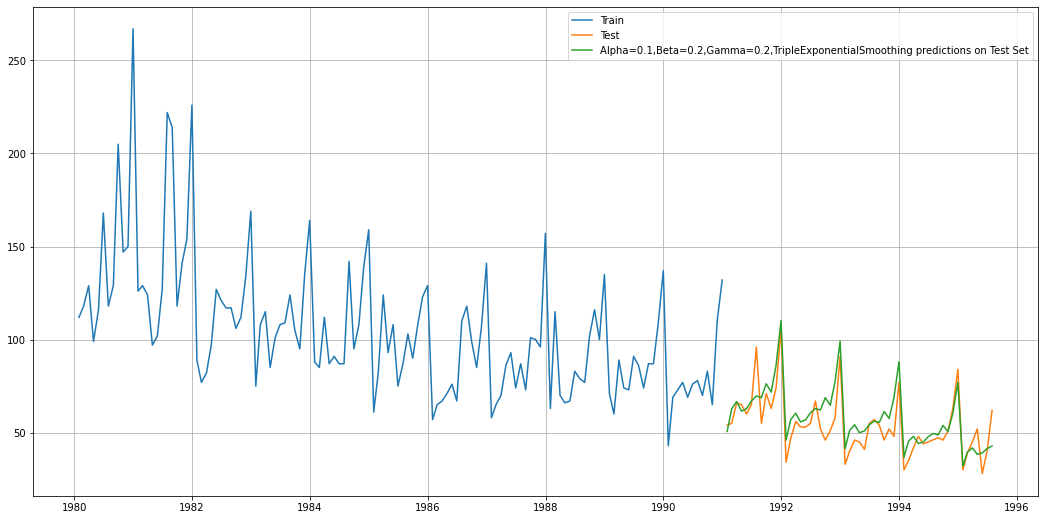

In [122]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [179]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                    15.255435
NaiveModel                                          79.672238
SimpleAverageModel                                  53.413057
2pointTrailingMovingAverage                         11.801718
4pointTrailingMovingAverage                         15.360804
6pointTrailingMovingAverage                         15.852264
9pointTrailingMovingAverage                         16.336588
Alpha=0.995,SimpleExponentialSmoothing              36.748161
Alpha=0.1,SimpleExponentialSmoothing                36.779952
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.873754
Alpha=0.0646,Beta=0.0531,Gamma=0.0,TripleExpone...  21.095148
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.627968

In [180]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.627968
2pointTrailingMovingAverage                         11.801718
RegressionOnTime                                    15.255435
4pointTrailingMovingAverage                         15.360804
6pointTrailingMovingAverage                         15.852264
9pointTrailingMovingAverage                         16.336588
Alpha=0.0646,Beta=0.0531,Gamma=0.0,TripleExpone...  21.095148
Alpha=0.995,SimpleExponentialSmoothing              36.748161
Alpha=0.1,SimpleExponentialSmoothing                36.779952
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.873754
SimpleAverageModel                                  53.413057
NaiveModel                                          79.672238

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

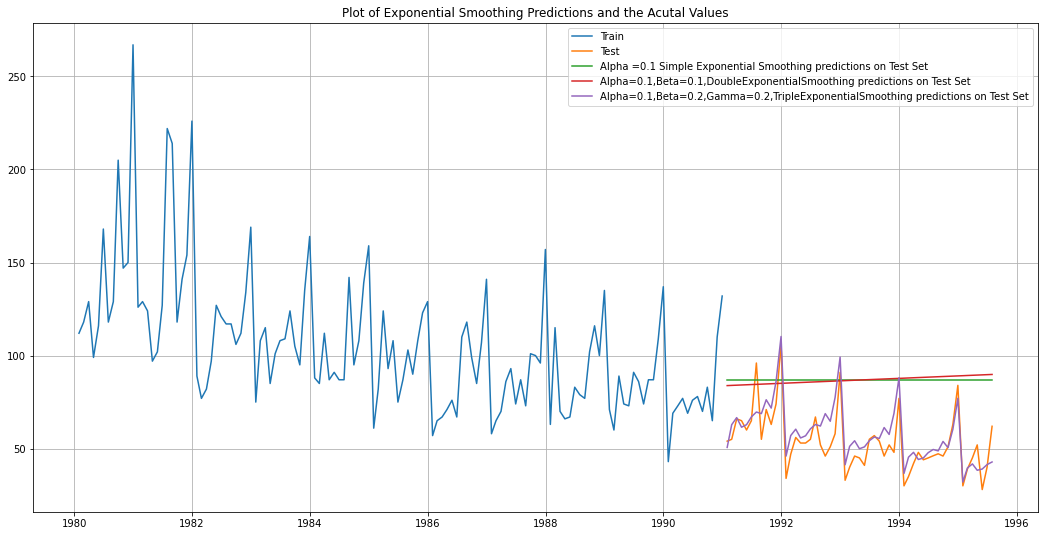

In [125]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');


## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

#### Here we can state that the hypothesis and null hypothesis on the data to whether data have stationary or not.
Null hypothesis - H0: Provided data is non-stationary <br>
Hypothesis - Ha: Provided data is stationary

## Check for stationarity of the whole Time Series data.

In [50]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

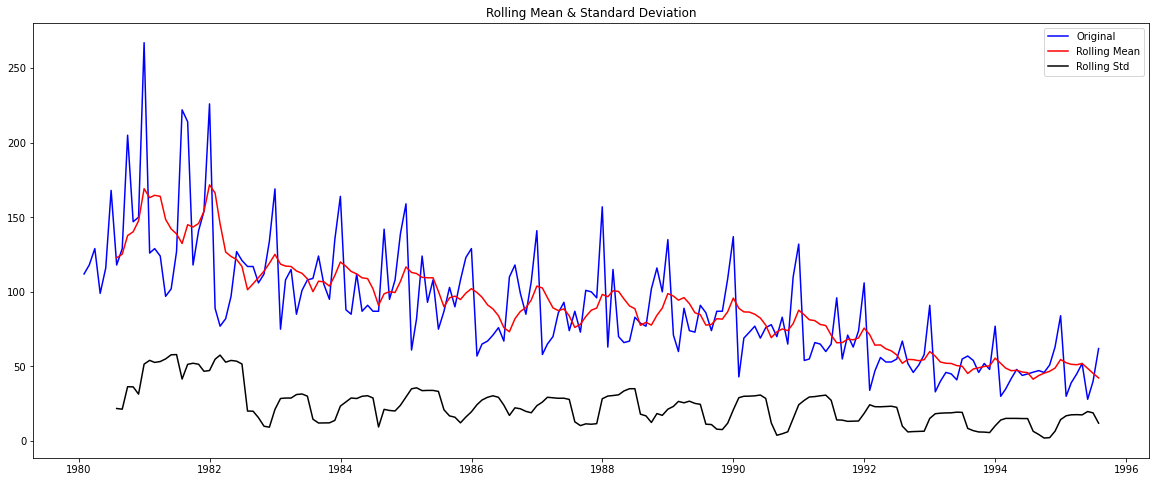

Results of Dickey-Fuller Test:
Test Statistic                  -1.880931
p-value                          0.341084
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [51]:
test_stationarity(df_2['Rose'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

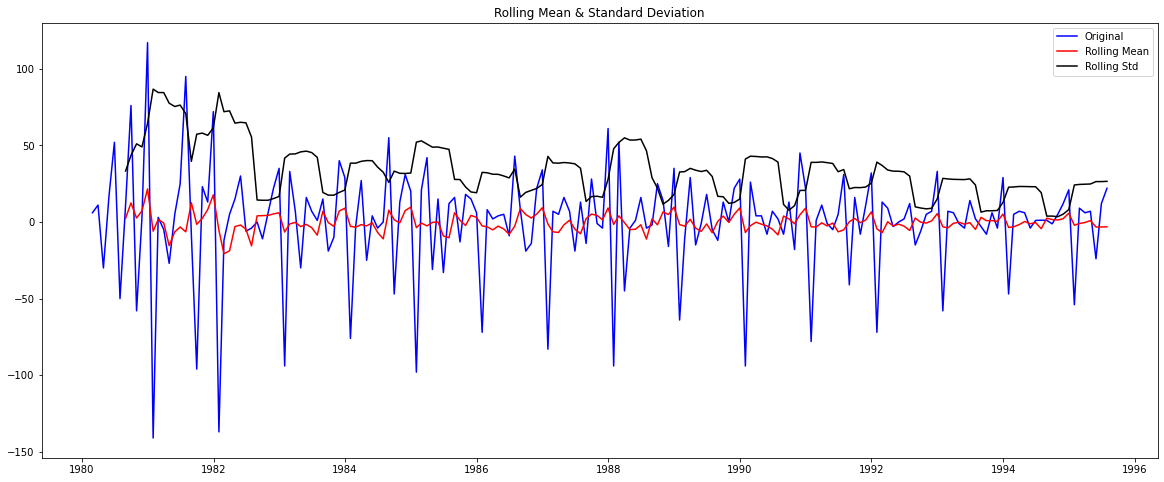

Results of Dickey-Fuller Test:
Test Statistic                -8.044820e+00
p-value                        1.806363e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [52]:
test_stationarity(df_2['Rose'].diff().dropna())

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

#### Check for stationarity of the Training Data Time Series.

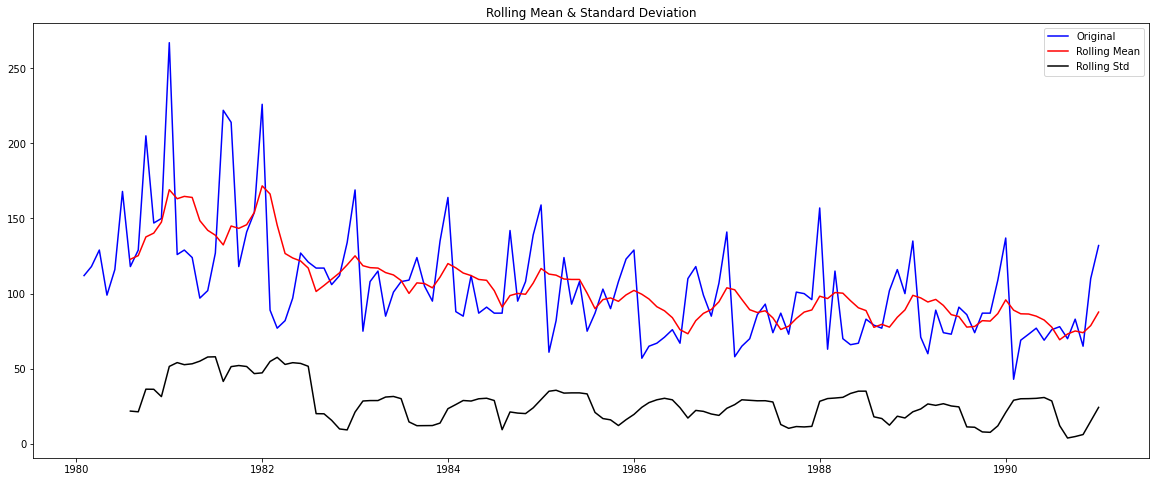

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [126]:
test_stationarity(train['Rose'])

We see that the series is not stationary at $\alpha$ = 0.05.

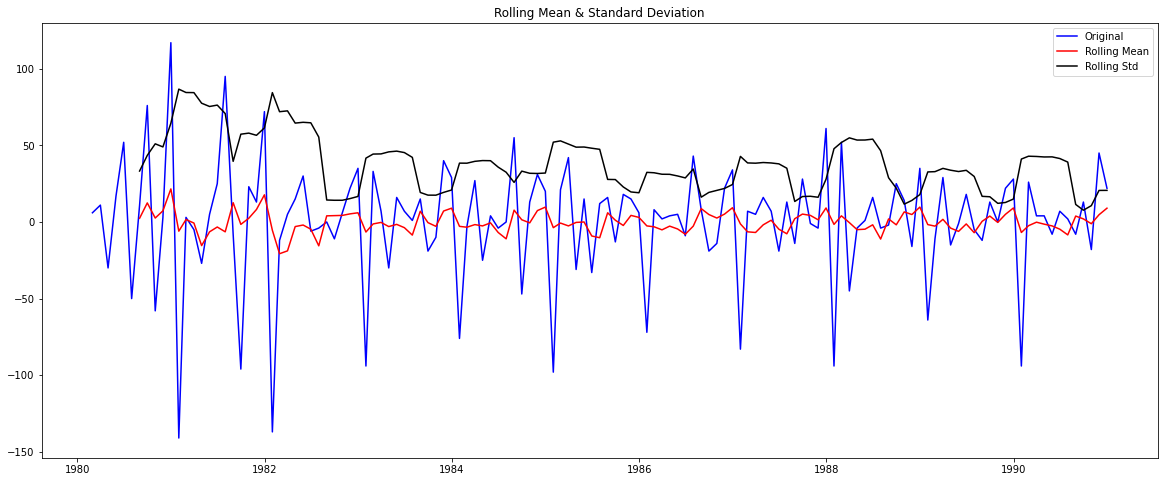

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [127]:
test_stationarity(train['Rose'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [128]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [129]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [130]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464295
ARIMA(0, 1, 2) - AIC:1276.8353724265137
ARIMA(1, 1, 0) - AIC:1319.3483105801872


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(1, 1, 1) - AIC:1277.7757564460412


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.

ARIMA(1, 1, 2) - AIC:1277.3592268716257
ARIMA(2, 1, 0) - AIC:1300.6092611743966
ARIMA(2, 1, 1) - AIC:1279.045689409328
ARIMA(2, 1, 2) - AIC:1279.2986939365442


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [131]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1276.835372
5  (1, 1, 2)  1277.359227
4  (1, 1, 1)  1277.775756
7  (2, 1, 1)  1279.045689
8  (2, 1, 2)  1279.298694
1  (0, 1, 1)  1280.726183
6  (2, 1, 0)  1300.609261
3  (1, 1, 0)  1319.348311
0  (0, 1, 0)  1335.152658

In [132]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sat, 18 Dec 2021   AIC                           1276.835
Time:                        23:45:11   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


## Predict on the Test Set using this model and evaluate the model.

In [133]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [134]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.604309392279328


In [191]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf = pd.concat([resultsDf,resultsDf_9])

resultsDf

Test RMSE
ARIMA(0,1,2)  18.478455

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

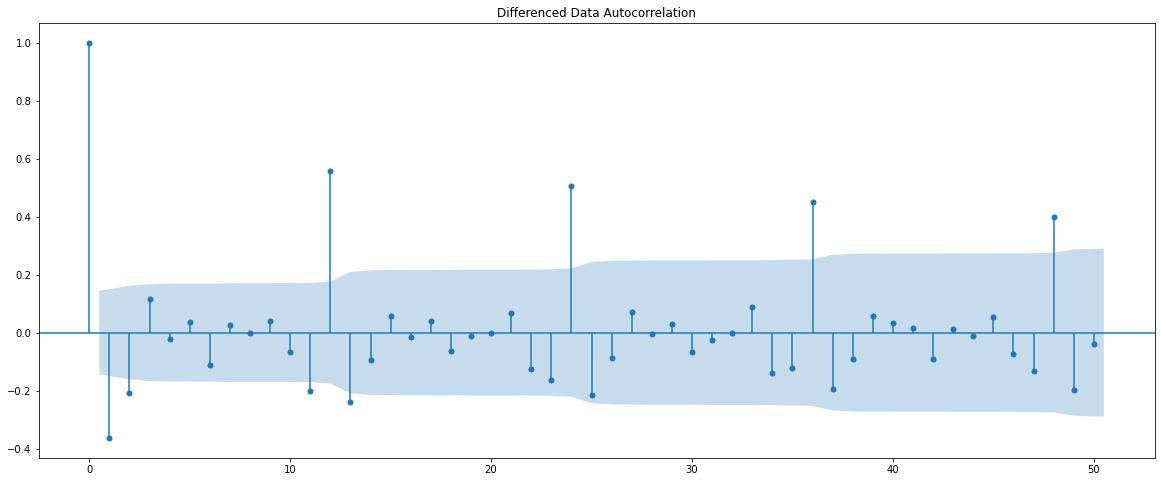

In [142]:
plot_acf(df_2['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality 12.

### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [143]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [144]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [145]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720736
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.437529638089
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.020786938656
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635749872
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697505
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945852
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918337
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.631404938373
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918096
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330946191
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483297815
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536011
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461685
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988260848519
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.6675430541043
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.486697526493
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617702
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843413446
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933525677
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913605249
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257991
SARIMA(0, 1, 2)x(2, 0,

In [146]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
53  (1, 1, 2)  (2, 0, 2, 12)  896.686895
78  (2, 1, 2)  (2, 0, 0, 12)  897.346444

In [147]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sat, 18 Dec 2021   AIC                            887.938
Time:                                    23:51:44   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.668     -0.004      0.996    -372.585     370.899
ma.L2         -0.1573     29.798   

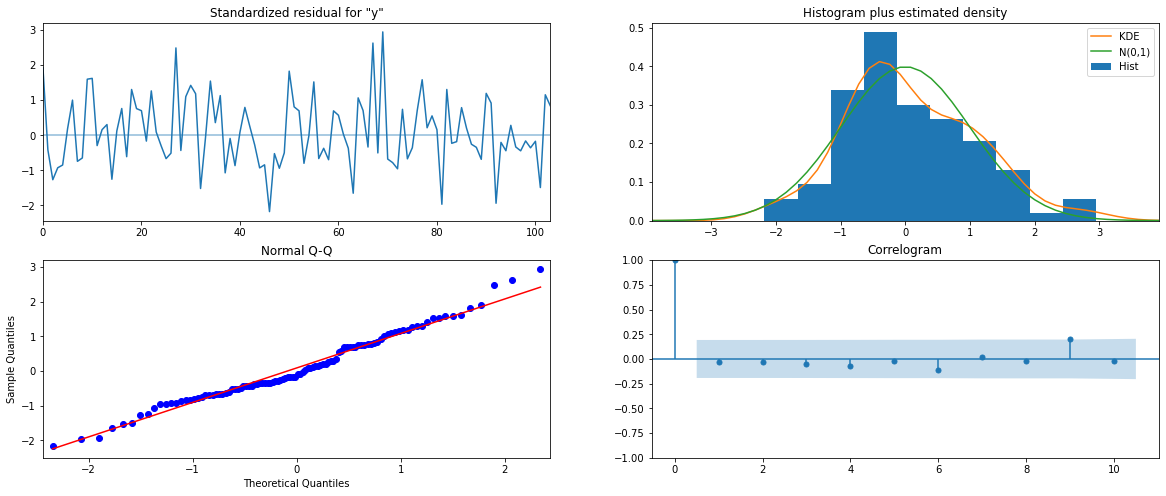

In [148]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [149]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [150]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.867263  15.928500      31.647976      94.086549
1  70.541190  16.147658      38.892361     102.190018
2  77.356410  16.147656      45.707586     109.005234
3  76.208814  16.147656      44.559990     107.857638
4  72.747397  16.147656      41.098574     104.396221

In [195]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.880624949574504


In [197]:
resultsDf_9_2 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,resultsDf_9_2])

resultsDf

Test RMSE       RMSE
ARIMA(0,1,2)             18.478455        NaN
ARIMA(4,1,2)             18.478455        NaN
ARIMA(4,1,2)             33.903103        NaN
SARIMA(0,1,2)(2,0,2,12)        NaN  26.880625
SARIMA(0,1,2)(2,0,2,12)  26.880625        NaN

We see that the RMSE value have reduced further when the seasonality parameter used to 12 compared with ARIMA model.

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

Let us look at the ACF and the PACF plots once more.

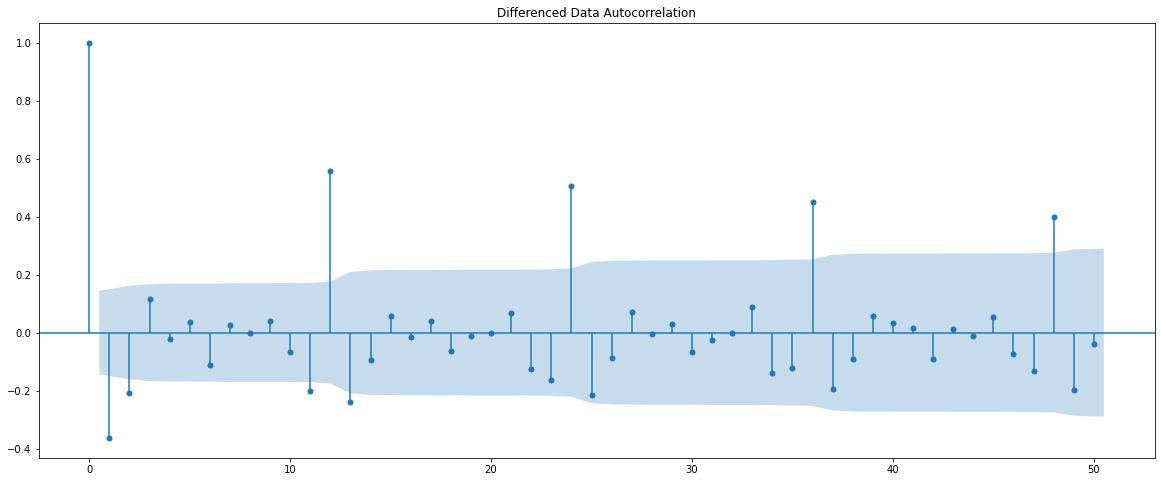

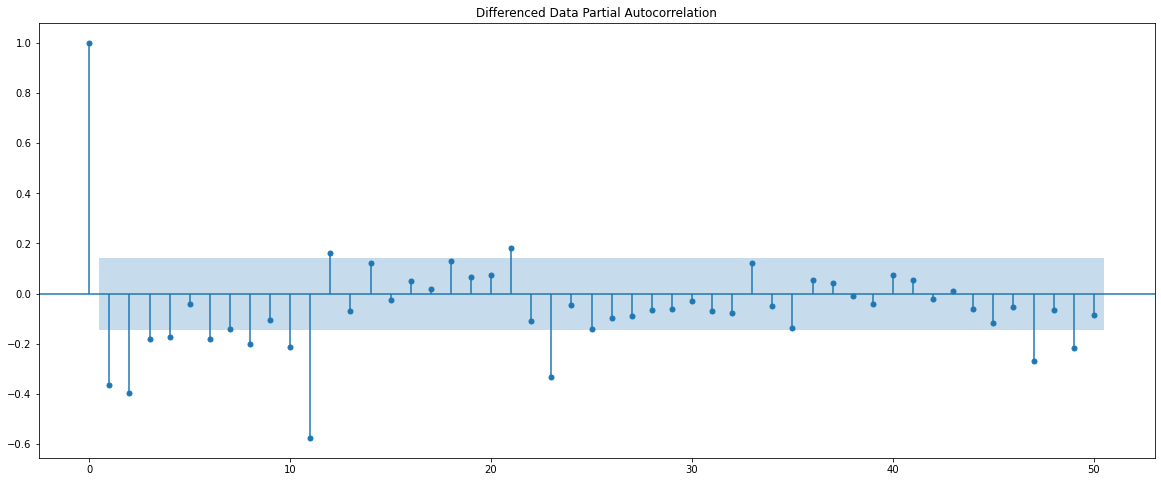

In [137]:
plot_acf(df_2['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_2['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 4.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.


In [138]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(4,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -633.876
Method:                       css-mle   S.D. of innovations             29.793
Date:                Sat, 18 Dec 2021   AIC                           1283.753
Time:                        23:47:23   BIC                           1306.754
Sample:                    02-29-1980   HQIC                          1293.099
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1905      0.576     -0.331      0.741      -1.319       0.938
ar.L1.D.Rose     1.1685      0.087     13.391      0.000       0.997       1.340
ar.L2.D.Rose    -0.3562      0.132     -2.69

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWar

## Predict on the Test Set using this model and evaluate the model.

In [139]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [193]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

33.90310316763995


In [194]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(4,1,2)'])


resultsDf = pd.concat([resultsDf,resultsDf_9_1])

resultsDf

Test RMSE
ARIMA(0,1,2)  18.478455
ARIMA(4,1,2)  18.478455
ARIMA(4,1,2)  33.903103

We see that there is difference in the RMSE values for both the models, but remember that the second model is a much simpler model.

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.

Let us look at the ACF and the PACF plots once more.

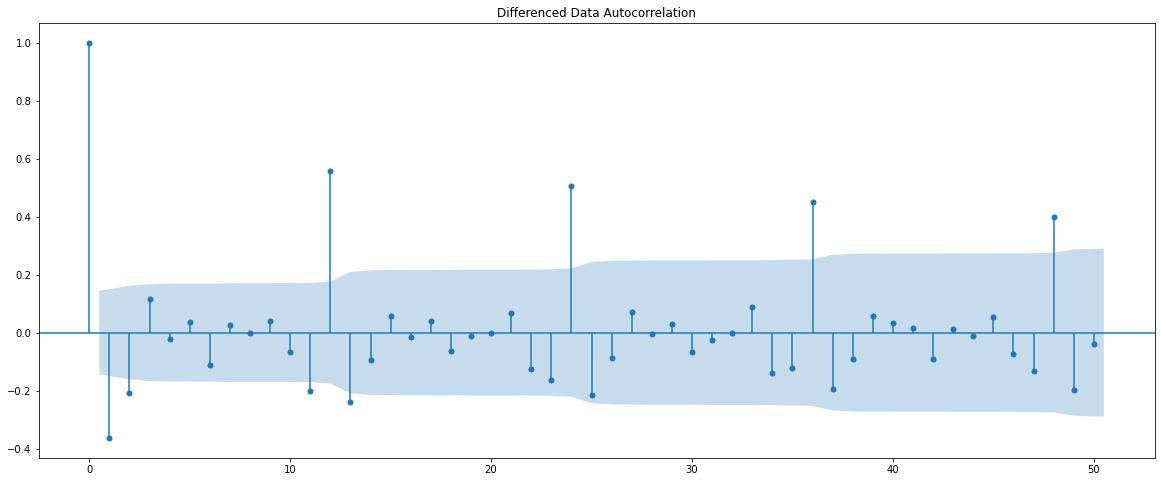

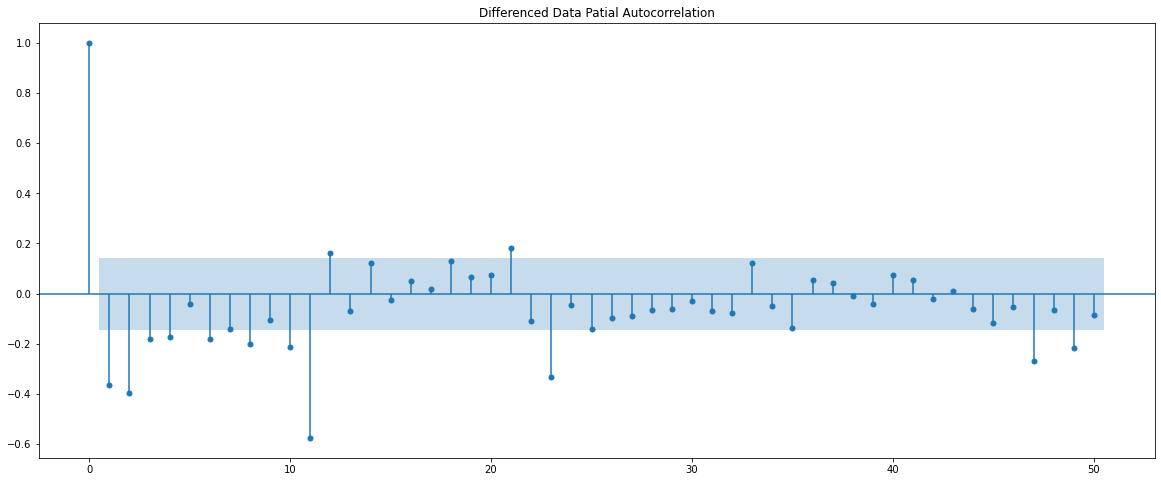

In [153]:
plot_acf(df_2['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_2['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

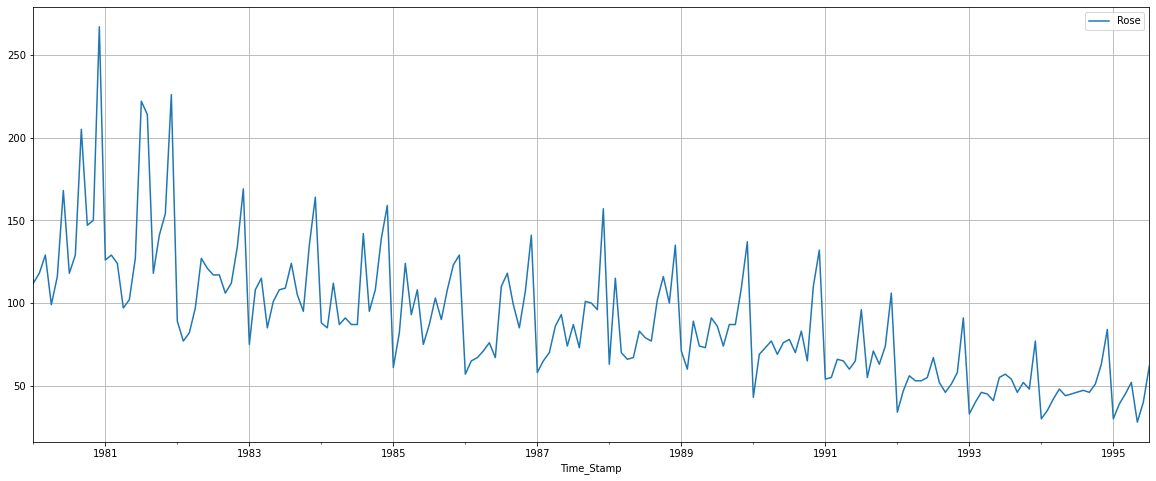

In [154]:
df_2.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

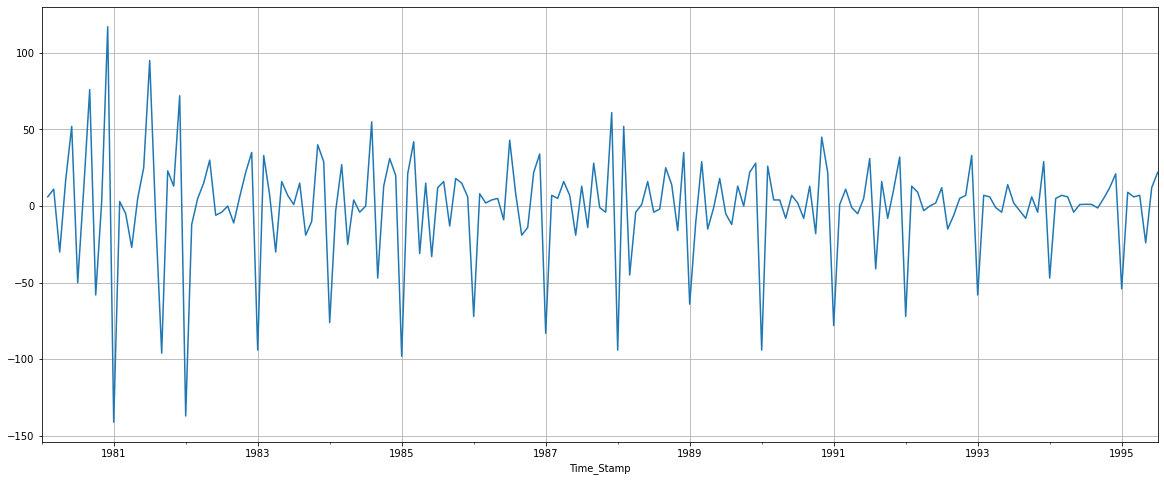

In [155]:
(df_2['Rose'].diff()).plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

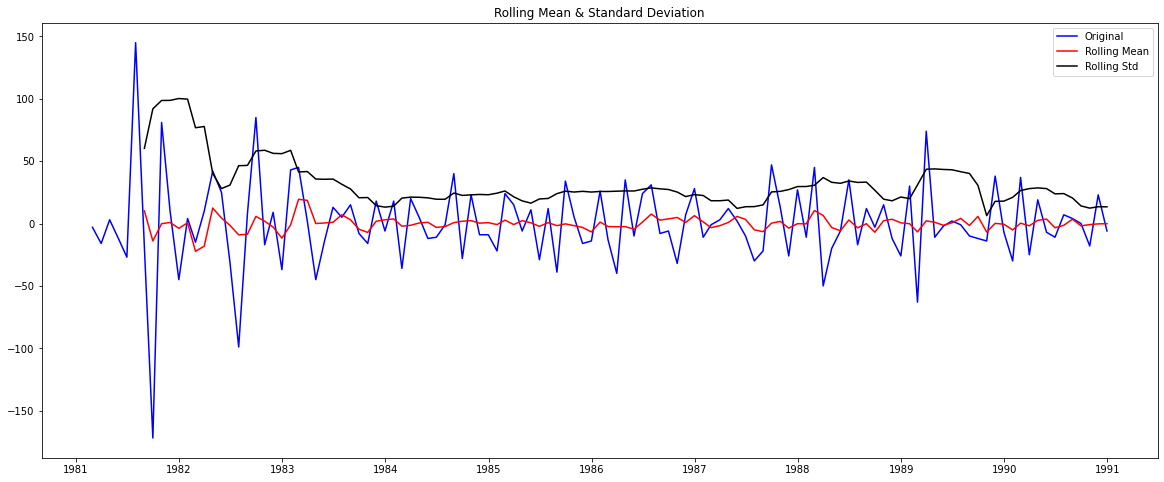

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [157]:
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

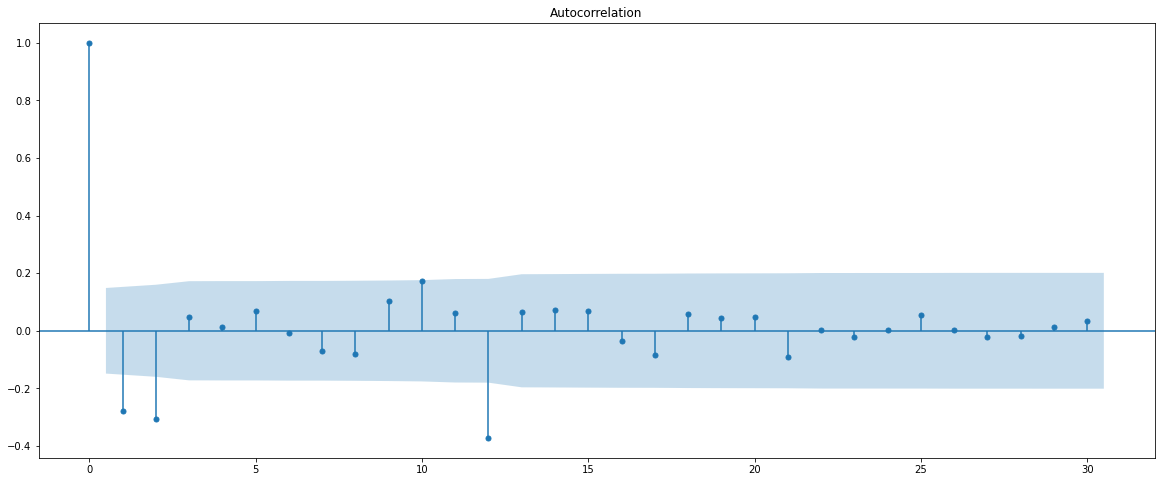

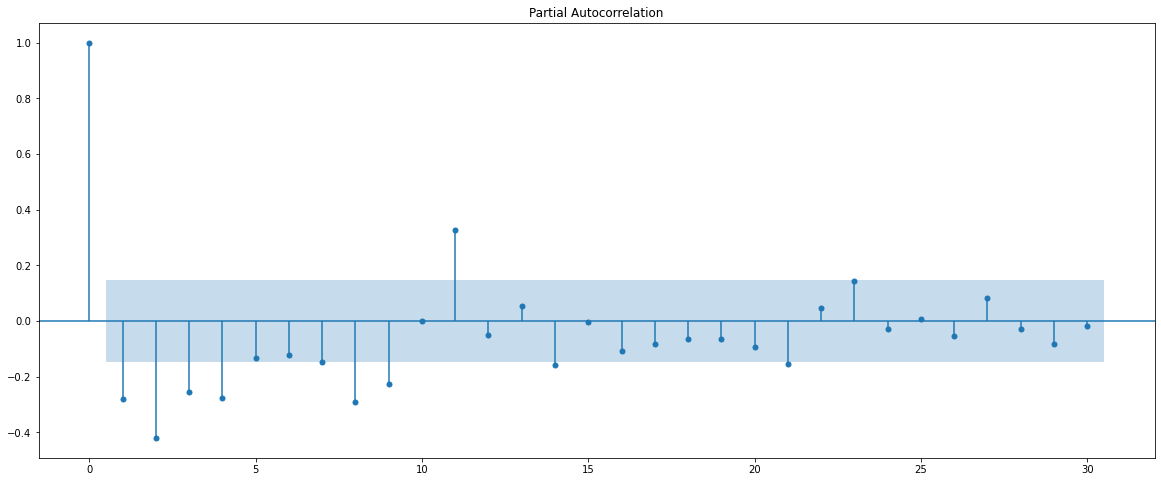

In [159]:
plot_acf((df_2['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df_2['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 4. 
* The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 2.

In [214]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(4, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(4, 0, 2, 12)   Log Likelihood                -329.991
Date:                            Sun, 19 Dec 2021   AIC                            685.983
Time:                                    09:41:59   BIC                            716.786
Sample:                                         0   HQIC                           698.324
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7326      0.131      5.613      0.000       0.477       0.988
ar.L2         -0.2160      0.152   

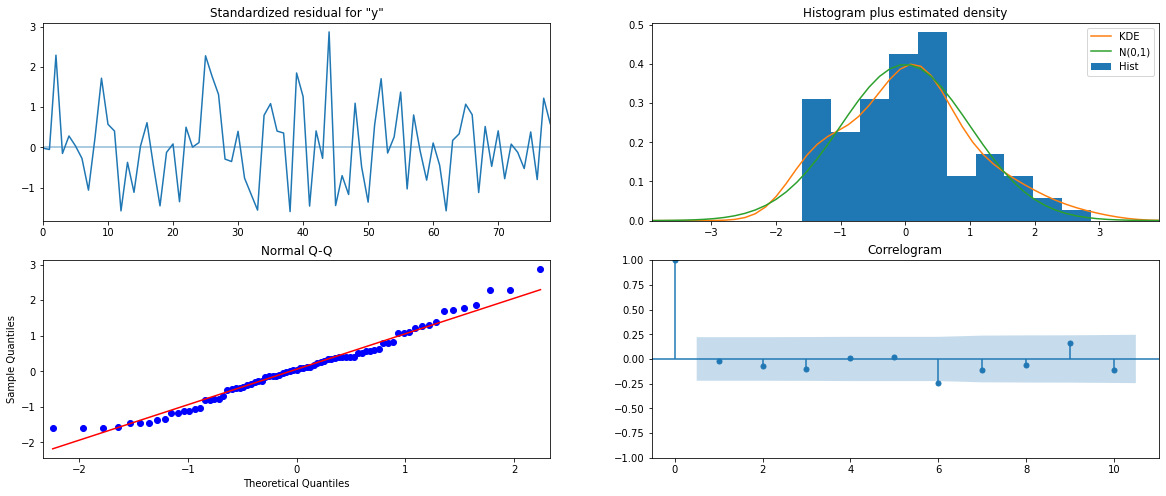

In [215]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

## Predict on the Test Set using this model and evaluate the model.

In [216]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [217]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  46.479544  14.737117      17.595326      75.363763
1  71.645310  14.838363      42.562653     100.727968
2  67.101893  15.083614      37.538552      96.665234
3  64.351942  15.477899      34.015817      94.688067
4  68.458670  15.705788      37.675891      99.241449

In [218]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

18.478455136005227


In [199]:
resultsDf_9_3 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(4,1,2)(4,0,2,12)'])


resultsDf = pd.concat([resultsDf,resultsDf_9_3])

resultsDf

Test RMSE       RMSE
ARIMA(0,1,2)             18.478455        NaN
ARIMA(4,1,2)             18.478455        NaN
ARIMA(4,1,2)             33.903103        NaN
SARIMA(0,1,2)(2,0,2,12)        NaN  26.880625
SARIMA(0,1,2)(2,0,2,12)  26.880625        NaN
SARIMA(4,1,2)(4,0,2,12)  18.478455        NaN

## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [203]:
resultsDf = pd.DataFrame({'Test RMSE': []})
resultsDf = pd.concat([resultsDf, resultsDf_1])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf = pd.concat([resultsDf,resultsDf_9])
resultsDf = pd.concat([resultsDf,resultsDf_9_1])
resultsDf = pd.concat([resultsDf,resultsDf_9_2])
resultsDf = pd.concat([resultsDf,resultsDf_9_3])

resultsDf

Test RMSE
RegressionOnTime                                    15.255435
NaiveModel                                          79.672238
SimpleAverageModel                                  53.413057
2pointTrailingMovingAverage                         11.801718
4pointTrailingMovingAverage                         15.360804
6pointTrailingMovingAverage                         15.852264
9pointTrailingMovingAverage                         16.336588
Alpha=0.995,SimpleExponentialSmoothing              36.748161
Alpha=0.1,SimpleExponentialSmoothing                36.779952
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.873754
Alpha=0.0646,Beta=0.0531,Gamma=0.0,TripleExpone...  21.095148
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.627968
ARIMA(0,1,2)                                        18.478455
ARIMA(4,1,2)                                        33.903103
SARIMA(0,1,2)(2,0,2,12)                             26.880625
SARIMA(4,1,2)(4,0,2,12)                             18.478455

In [204]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   9.627968
2pointTrailingMovingAverage                         11.801718
RegressionOnTime                                    15.255435
4pointTrailingMovingAverage                         15.360804
6pointTrailingMovingAverage                         15.852264
9pointTrailingMovingAverage                         16.336588
ARIMA(0,1,2)                                        18.478455
SARIMA(4,1,2)(4,0,2,12)                             18.478455
Alpha=0.0646,Beta=0.0531,Gamma=0.0,TripleExpone...  21.095148
SARIMA(0,1,2)(2,0,2,12)                             26.880625
ARIMA(4,1,2)                                        33.903103
Alpha=0.995,SimpleExponentialSmoothing              36.748161
Alpha=0.1,SimpleExponentialSmoothing                36.779952
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       36.873754
SimpleAverageModel                                  53.413057
NaiveModel                                          79.672238

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.

We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters α = 0.1, β = 0.2 and γ = 0.2.

## Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

For this data set, we can build only the top 1 model which gave us the best accuracy (least RMSE).

This one model to be built on the whole data are the following:

Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing

In [205]:
fullmodel1 = ExponentialSmoothing(df_2,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1,
                                                                 smoothing_trend=0.2,
                                                                 smoothing_seasonal=0.2)

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [206]:
RMSE_fullmodel1 = metrics.mean_squared_error(df_2['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 17.401022195524558


In [207]:
# Getting the predictions for the 12 months
prediction_1 = fullmodel1.forecast(steps=12)

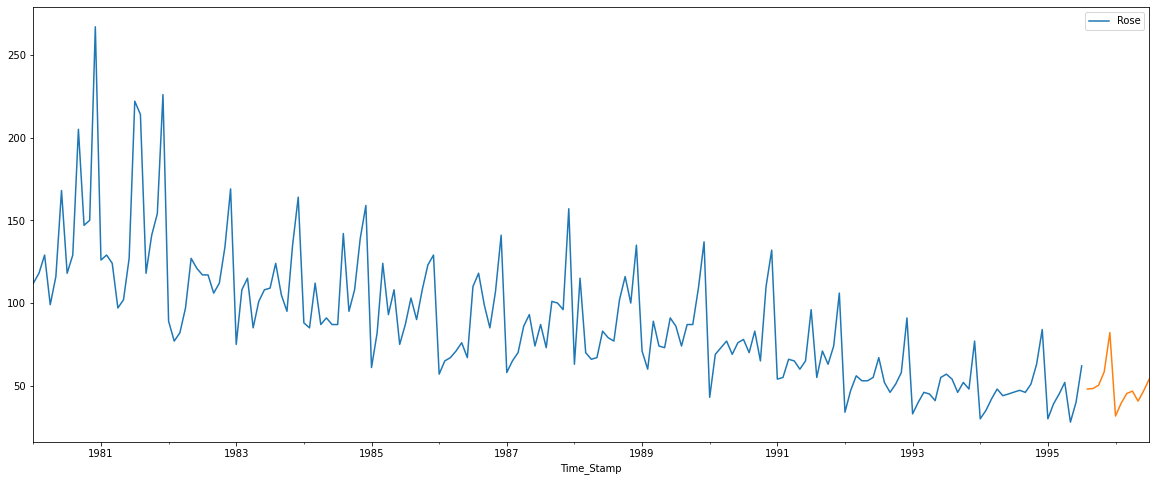

In [208]:
df_2.plot()
prediction_1.plot();

In [209]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df_2 = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df_2

lower_CI  prediction    upper_ci
1995-08-31  13.851035   48.029859   82.208684
1995-09-30  14.141103   48.319928   82.498752
1995-10-31  16.115414   50.294238   84.473063
1995-11-30  24.276905   58.455730   92.634554
1995-12-31  47.916799   82.095623  116.274448
1996-01-31  -2.495024   31.683800   65.862624
1996-02-29   5.225625   39.404449   73.583273
1996-03-31  11.139919   45.318744   79.497568
1996-04-30  12.566779   46.745603   80.924427
1996-05-31   6.502404   40.681228   74.860052
1996-06-30  12.749748   46.928573   81.107397
1996-07-31  19.985216   54.164040   88.342864

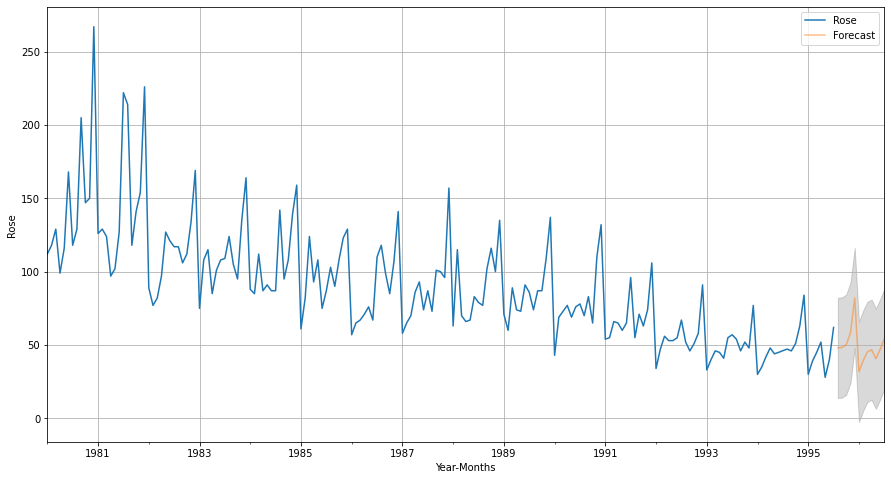

In [210]:
# plot the forecast along with the confidence band

axis = df_2.plot(label='Actual', figsize=(15,8))
pred_1_df_2['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df_2.index, pred_1_df_2['lower_CI'], pred_1_df_2['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

## 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales

For the this dataset, we had trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the other models based on the RMSE value.

In this particular case, we have built several models and find the best model for forecasting. This model gave us the best accuracy on the forecast data since it has the least RMSE value. The next 12 month data is forecasted using the provided data with the parameters of Alpha=0.1, Beta=0.2¬¬, Gamma=0.2 using Triple Exponential Smoothing model.

In order to forecast, we train and test the accuracy in the provided data and select best model. The forecasted data will not be 100% match with next month’s original data. So that we have mentioned with 95% confident level and data also forecasted with lower and upper confidance intervals. 

Steps performed in this project: 
1.	We have used the below models and check the RMSE values to find the better model for time series forecasting. The models are,
Simple Exponential Smoothing, Double Exponential Smoothing, Triple Exponential Smoothing, ARIMA, SARIMA, Moving Average, Simple Average, Linear Regression and Naïve Model.
2.	Find the Low RMSE model and forecast the 12 month data with 95% confidance intervals.

Suggestion to the company to get more wine sales:
1.	Introduce varieties in the products based on  flavours, packing etc based on customer needs
2.	Make the products available in various quantities by volume.
3.	Create combo offers like customised packs in various quantities along with the bestselling ones.
4.	Offers to regular customers on purchases based on volumes.
5.	Offers for recommendations and referrals.
6.	New product introduction based on the prior customer survey to meet the exact demand of the market. 
7.	Also, make survey to measure the popularity or suggestion on the existing product. It will help to make an improvement on sales.
8.	Frequent campaigns and customer engagements to understand the consumer behaviour.
9.	Make use of online store to get more sales.
10.	Make an offers to reduce the delivery charge or give addition of free product for high volume purchases.
